In [ ]:
#Step 1- Introduction

# Data set taken from WHO website of The WHO air quality database compiles data on ground measurements of 
#annual mean concentrations of particulate matter and nitrogen dioxide. The database is updated regularly
#every 2-3 years since 2011. The data compiled in this database is used as input to derive the Sustainable 
#Development Goal Indicator 11.6.2, Air quality in cities, for which WHO is the custodial agency.

#The Fifth WHO air quality database – the largest of its kind – covers over 6000 cities/human settlements, 
#mostly cities, in 117 countries, and indicates where air pollution levels and the related health risks are higher. 


In [ ]:
# Step 2- Setting Up a problem statement

'''
The mean annual concentration of particulate matter and NO2 of PM2.5  have been increasing continuously in the 
south east asia region comapred to the other regions of the world.

'''

In [1]:
# Step 3 Importing Libraries
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # importing Numerical python
import pandas as pd                                                 # Importing for panel data analysis
import time as time
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Step 4- Data Aquisition and Description
#This data base is from April 2022 and its the fifth such data collected. Is the largest dataset of its kind which covers 
# over 6000 cities/huma settelments from acros 117 countries.


# ID	Features	Descriptions
#01	WHO Region	The 6 regions of the world have been described under this column.
#02	ISO3	Gives the abbreviation for the 117 countries
#03	WHO Country Name	Gives the name of various countries
#04	City or Locality	Gives name of the city or locality in that country
#05	Measurement Year	Defines the year in which data was recorded
#06	PM2.5(μg/m3)	Annual mean concentration of particulate matter of less than 10 microns of diameter (PM10) [ug/m3] and of less than 2.5 microns (PM2.5)  [ug/m3] and of NO2  [ug/m3] in cities and localities
#07	PM10 (μg/m3)	Annual mean concentration of particulate matter of less than 10 microns of diameter (PM10) [ug/m3] and of less than 2.5 microns (PM2.5)  [ug/m3] and of NO2  [ug/m3] in cities and localities
#08	NO2 (μg/m3)	Annual mean concentration of particulate matter of less than 10 microns of diameter (PM10) [ug/m3] and of less than 2.5 microns (PM2.5)  [ug/m3] and of NO2  [ug/m3] in cities and localities
#09	PM2.5 temporal coverage (%)	The percentage of coverage PM2.5 of the year, as a mean of the percentage coverage of the station, when available
#10	PM10 temporal coverage (%)	The percentage of coverage PM10 of the year, as a mean of the percentage coverage of the station, when available
#11	NO2 temporal coverage (%)	The percentage of coverage NO2of the year, as a mean of the percentage coverage of the station, when available
#12	Reference	This states the reference from which the data was taken. Measurements reported by the following regional networks were also used: Clean Air for Asia, the Air quality e-reporting database of the European Environment Agency for Europe and the AirNow Programme from the United States embassies and consulates. If such official data were not available, values from peer-reviewed journals were used.
#13	Number and type of monitoring stations	The number and type of monitoring station where described were referred to.
#14	Version of the database	Describes the year in which the mean annual value for the air pollutant particle was used.
#15	Status	The values that are referred to as "Under review" are currently being updated.

In [2]:
# Loading remote excel files using pandas .read_excel() method and setting ID as index

air_df = pd.read_excel(io='C:\personal\INSAID DATA SCEINE\Minor Project\who_aap_2021_v8_new.xlsx', sheet_name=0)


In [18]:
print('Data Shape:',air_df.shape)

Data Shape: (32131, 15)


In [17]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           14988 non-null  float64
 6   PM10 (μg/m3)                            21111 non-null  float64
 7   NO2 (μg/m3)                             22198 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5380 non-null   float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [19]:
air_df.describe()

,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Version of the database,Status
count,32131.000000,14988.000000,21111.000000,22198.000000,7275.000000,5380.000000,19893.000000,32131.000000,0.0
mean,2015.571629,22.891974,30.502450,20.597707,90.794302,90.576807,93.695904,2021.743737,NaN
std,2.751577,17.945213,29.240538,12.093280,14.872798,13.818083,10.450717,1.052821,NaN
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000,NaN
25%,2014.000000,10.320000,16.980000,11.990000,88.595890,87.945000,93.207763,2022.000000,NaN
50%,2016.000000,15.975000,22.000000,18.800000,97.000000,96.027250,96.364155,2022.000000,NaN
75%,2018.000000,31.000000,31.280000,27.137500,99.000000,98.938000,98.926941,2022.000000,NaN
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000,NaN


In [ ]:
# Step 5- Data Pre-Profilling
# Getting detailed report about the data
#Getting detailed analysis of each variable, along with detail about the distribution of each variable


In [3]:
air_df.nunique()

WHO Region                                   6
ISO3                                       118
WHO Country Name                           118
City or Locality                          6880
Measurement Year                            21
PM2.5 (μg/m3)                             4741
PM10 (μg/m3)                              5081
NO2 (μg/m3)                               4633
PM25 temporal coverage (%)                2307
PM10 temporal coverage (%)                2086
NO2 temporal coverage (%)                 6497
Reference                                  250
Number and type of monitoring stations     630
Version of the database                      3
Status                                       0
dtype: int64

In [10]:
# Getting variable by variable unique values
air_df['WHO Region'].unique()


array(['Eastern Mediterranean Region', 'European Region',
       'Region of the Americas', 'Western Pacific Region',
       'South East Asia Region', 'African Region', nan], dtype=object)

In [11]:
air_df['ISO3'].unique()

array(['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BOL', 'BRA', 'BTN', 'CAN', 'CHE',
       'CHL', 'CHN', 'CMR', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU',
       'DNK', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FRA', 'GBR', 'GEO', 'GHA', 'GRC', 'GTM', 'HND', 'HRV', 'HUN',
       'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KOR', 'KWT', 'LAO', 'LBN',
       'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDG', 'MDV',
       'MEX', 'MKD', 'MLT', 'MMR', 'MNE', 'MNG', 'MUS', 'MYS', 'NGA',
       'NLD', 'NOR', 'NPL', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'POL',
       'PRT', 'PRY', 'QAT', 'ROU', 'RUS', 'SAU', 'SEN', 'SGP', 'SLV',
       'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TJK', 'TKM', 'TTO', 'TUN',
       'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM',
       'ZAF'], dtype=object)

In [12]:
air_df['WHO Country Name'].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'United Arab Emirates',
       'Argentina', 'Australia', 'Austria', 'Belgium', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Bolivia (Plurinational State of)', 'Brazil', 'Bhutan', 'Canada',
       'Switzerland', 'Chile', 'China', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany', 'Denmark',
       'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'United Kingdom', 'Georgia', 'Ghana',
       'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Hungary',
       'Indonesia', 'India', 'Ireland', 'Iran (Islamic Republic of)',
       'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Republic of Korea', 'Kuwait',
       "Lao People's Democratic Republic", 'Lebanon', 'Liechtenstein',
       'Sri Lanka', 'Lithuania', 'Luxembourg', 'Latvia', 'Morocco',
       'Monaco', 'Ma

In [13]:
air_df['City or Locality'].unique()

array(['Kabul', 'Durres', 'Elbasan', ..., 'Waterberg', 'West Coast',
       'West Rand'], dtype=object)

In [15]:
air_df['Measurement Year'].unique()

array([2019, 2015, 2016, 2017, 2014, 2012, 2018, 2011, 2013, 2020, 2010,
       2000, 2001, 2002, 2003, 2004, 2006, 2007, 2009, 2008, 2021],
      dtype=int64)

In [16]:
air_df['PM2.5 (μg/m3)'].unique()

array([119.77,    nan,  14.32, ...,  70.42,  43.31,  18.86])

In [25]:
air_df['PM2.5 (μg/m3)'].mean()

22.891973578863176

In [26]:
air_df['PM2.5 (μg/m3)'].mode()

0   7.00000
dtype: float64

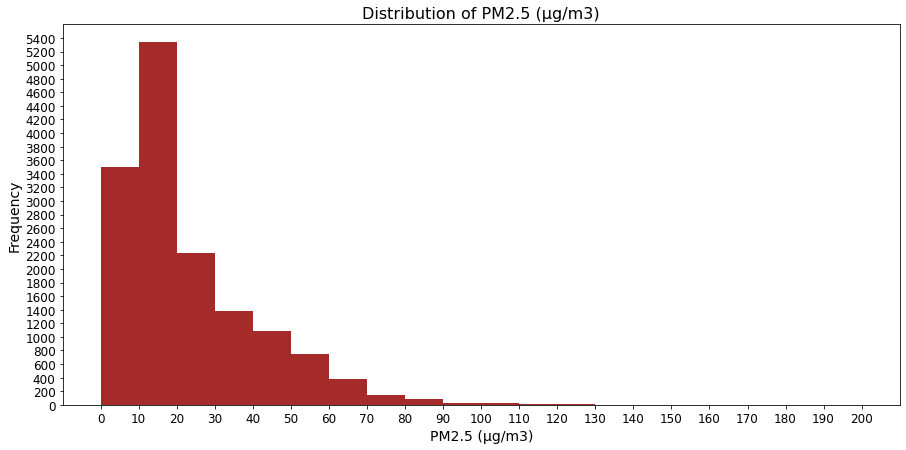

In [59]:
# drafting a rough histogram for the PM2.5 (μg/m3) variable to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

# Using magic of pandas area() function
air_df['PM2.5 (μg/m3)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 5500 with step size of 200 and label size of 12
plt.yticks(ticks=np.arange(0,5500,200), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM2.5 (μg/m3)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of PM2.5 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


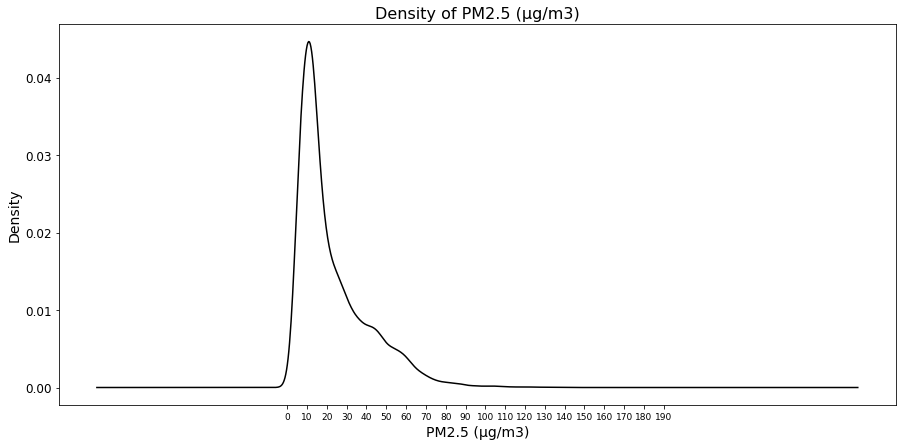

In [62]:
# Creating a kde of PM2.5() to see the distribution of data

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['PM2.5 (μg/m3)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 200 with step size of 10 and label size of 9
plt.xticks(ticks=np.arange(0, 200, 10), size=9)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM2.5 (μg/m3)', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of PM2.5 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


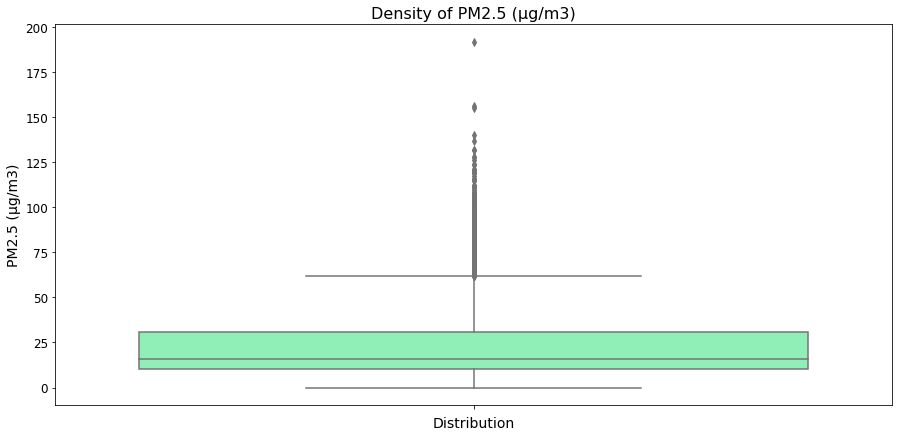

In [35]:
# creating a box plot for the PM2.5 (μg/m3) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='PM2.5 (μg/m3)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks ranging from 0 to 120 with step size of 25 label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM2.5 (μg/m3)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='Density of PM2.5 (μg/m3)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [17]:
air_df['PM10 (μg/m3)'].unique()

array([  nan, 17.65, 24.56, ..., 43.91, 48.62, 44.71])

In [42]:
air_df['PM10 (μg/m3)'].mean()

30.502450381317857

In [43]:
air_df['PM10 (μg/m3)'].mode()

0   17.00000
dtype: float64

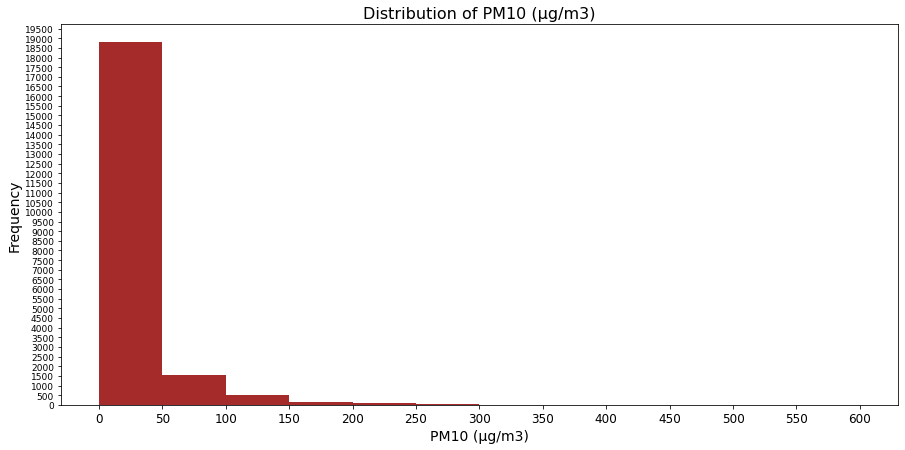

In [70]:
# making histogram for the variable PM10 (μg/m3) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,50,100,150,200,250,300,350,400,450,500,550,600]

# Using magic of pandas area() function
air_df['PM10 (μg/m3)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 20000 with step size of 500 and label size of 9
plt.yticks(ticks=np.arange(0,20000,500), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM10 (μg/m3)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of PM10 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

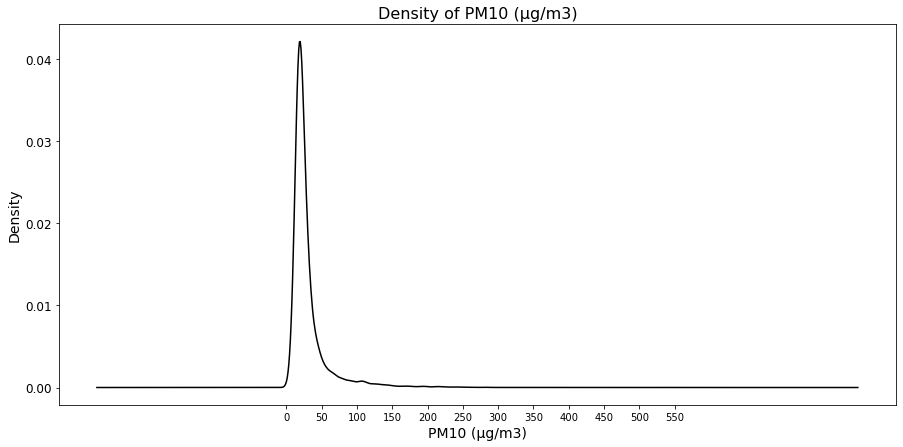

In [74]:
# making kde for the variable PM10 (μg/m3) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['PM10 (μg/m3)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 600 with step size of 50 and label size of 10
plt.xticks(ticks=np.arange(0, 600, 50), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM10 (μg/m3)', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of PM10 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

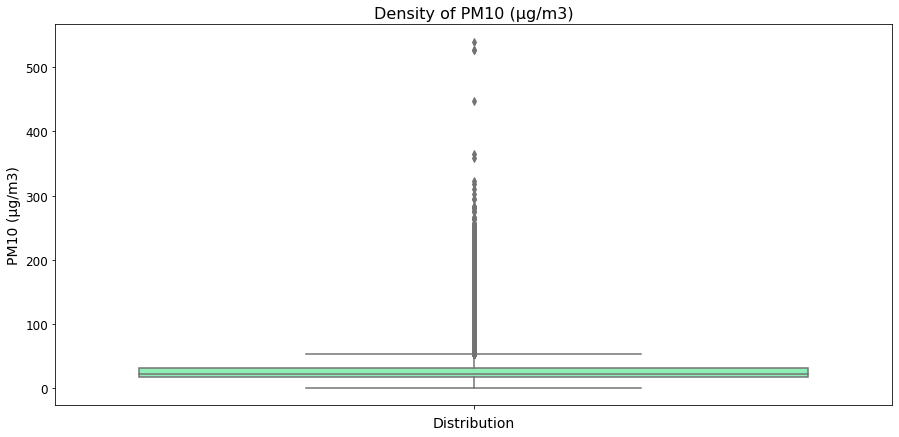

In [45]:
# creating a box plot for the PM10 (μg/m3) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='PM10 (μg/m3)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM10 (μg/m3)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='Density of PM10 (μg/m3)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [18]:
air_df['NO2 (μg/m3)'].unique()

array([   nan,  26.63,  24.78, ..., 124.28,  70.69,  40.41])

In [18]:
air_df['NO2 (μg/m3)'].mean()

20.597707451121707

In [19]:
air_df['NO2 (μg/m3)'].mode()

0   13.00000
dtype: float64

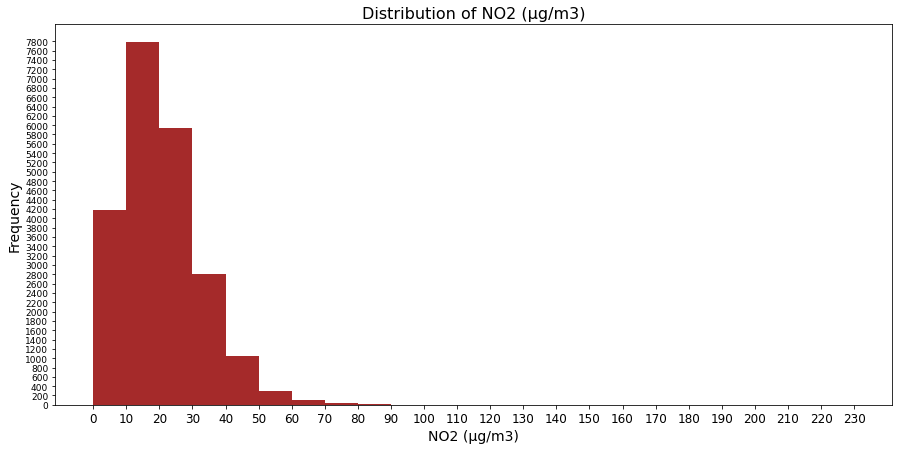

In [28]:
# making histogram for the variable NO2 (μg/m3) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230]

# Using magic of pandas area() function
air_df['NO2 (μg/m3)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 8000 with step size of 200 and label size of 9
plt.yticks(ticks=np.arange(0,8000,200), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='NO2 (μg/m3)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of NO2 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

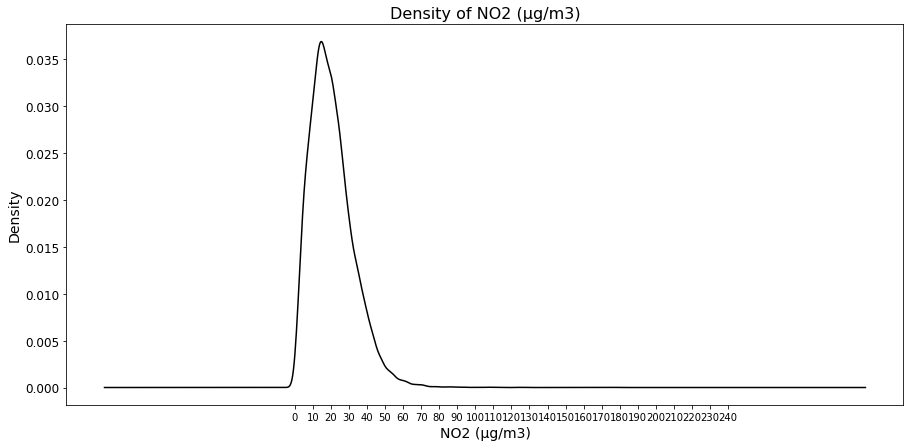

In [30]:
# making kde for the variable NO2 (μg/m3) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['NO2 (μg/m3)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 250 with step size of 10 and label size of 10
plt.xticks(ticks=np.arange(0, 250, 10), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='NO2 (μg/m3)', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of NO2 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

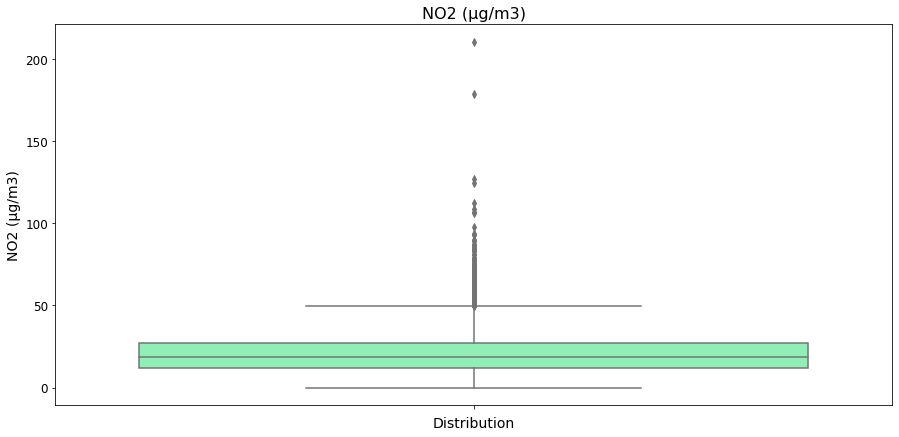

In [20]:
# creating a box plot for the NO2 (μg/m3) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='NO2 (μg/m3)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='NO2 (μg/m3)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='NO2 (μg/m3)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [19]:
air_df['PM25 temporal coverage (%)'].unique()

array([18.        ,         nan, 88.29385085, ..., 95.9107807 ,
       80.239726  , 93.652968  ])

In [31]:
air_df['PM25 temporal coverage (%)'].mean()

90.79430224852894

In [32]:
air_df['PM25 temporal coverage (%)'].mode()

0   100.00000
dtype: float64

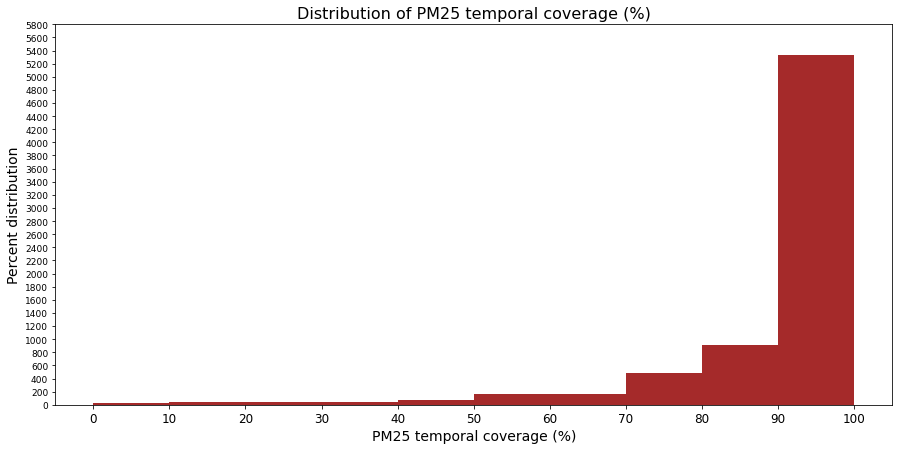

In [37]:
# making histogram for the variable PM25 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100]

# Using magic of pandas area() function
air_df['PM25 temporal coverage (%)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 6000 with step size of 200 and label size of 9
plt.yticks(ticks=np.arange(0,6000,200), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM25 temporal coverage (%)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Percent distribution', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of PM25 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

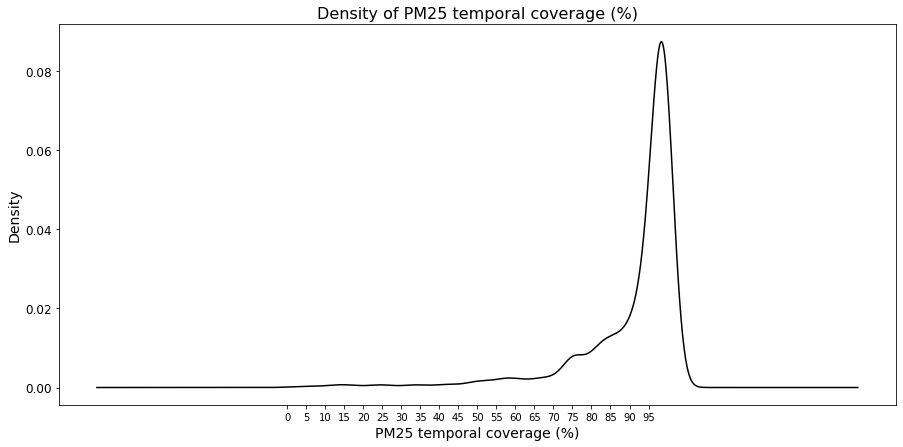

In [39]:
# making kde for the variable PM25 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['PM25 temporal coverage (%)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 100 with step size of 5 and label size of 10
plt.xticks(ticks=np.arange(0, 100, 5), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM25 temporal coverage (%)', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of PM25 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

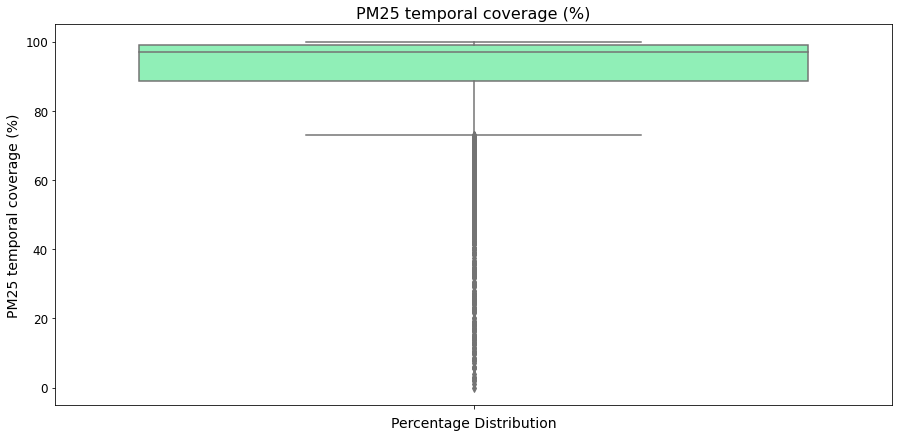

In [33]:
# creating a box plot for the PM25 temporal coverage (%) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='PM25 temporal coverage (%)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Percentage Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM25 temporal coverage (%)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='PM25 temporal coverage (%)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [20]:
air_df['PM10 temporal coverage (%)'].unique()

array([         nan,  91.66666667, 100.        , ...,  96.67808219,
        91.084     ,  48.21917808])

In [41]:
air_df['PM10 temporal coverage (%)'].mean()

90.57680681157377

In [42]:
air_df['PM10 temporal coverage (%)'].mode()

0   100.00000
dtype: float64

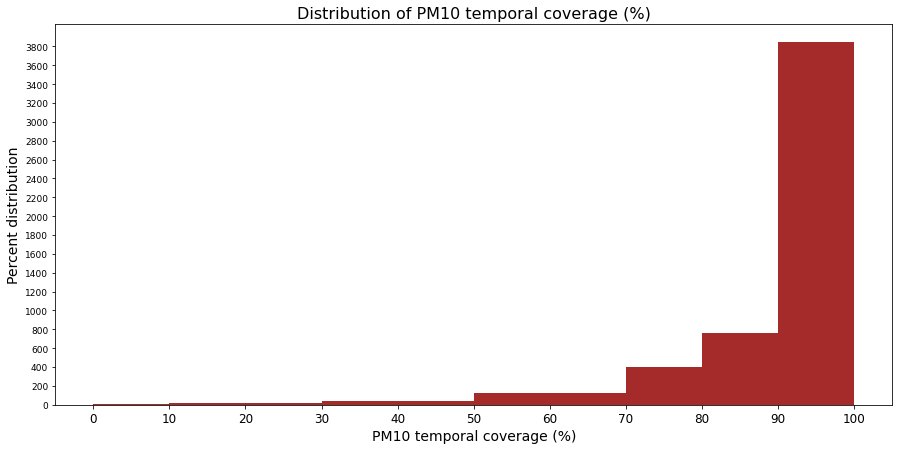

In [45]:
# making histogram for the variable PM10 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100]

# Using magic of pandas area() function
air_df['PM10 temporal coverage (%)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 4000 with step size of 200 and label size of 9
plt.yticks(ticks=np.arange(0,4000,200), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM10 temporal coverage (%)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Percent distribution', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of PM10 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

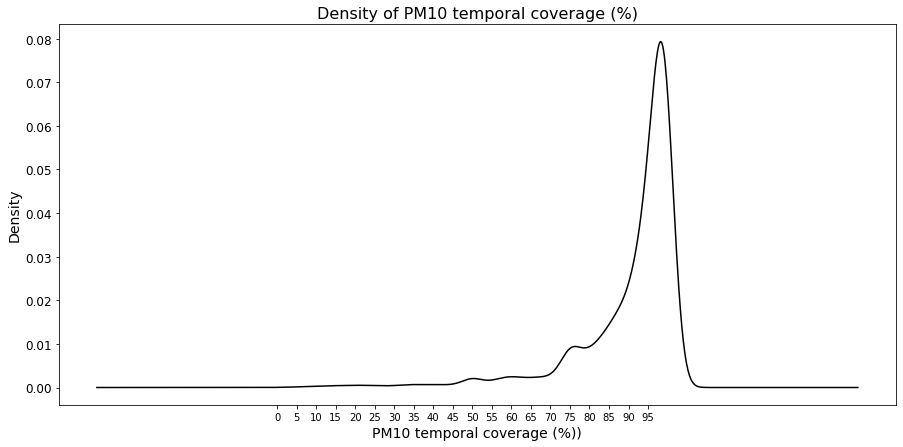

In [46]:
# making kde for the variable PM10 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['PM10 temporal coverage (%)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 100 with step size of 5 and label size of 10
plt.xticks(ticks=np.arange(0, 100, 5), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM10 temporal coverage (%))', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of PM10 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

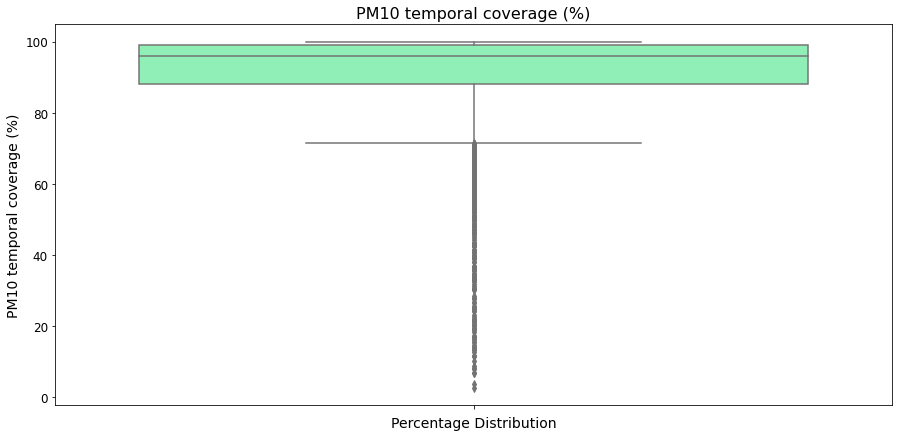

In [43]:
# creating a box plot for the PM10 temporal coverage (%) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='PM10 temporal coverage (%)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Percentage Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM10 temporal coverage (%)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='PM10 temporal coverage (%)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [21]:
air_df['Reference'].unique()

array(['U.S. Department of State, United States Environmental Protection Agency',
       'European Environment Agency (downloaded in 2021)',
       'Environment Agency - Abu Dhabi',
       'Statistics Center - Abu Dhabi from Environment Agency - Abu Dhabi / PM2.5 : AirNow U.S. Department of State, United States Environmental Protection Agency.',
       'Statistics Center - Abu Dhabi from Environment Agency - Abu Dhabi/ PM2.5 : AirNow U.S. Department of State, United States Environmental Protection Agency.',
       'Statistics Center - Abu Dhabi from Environment Agency - Abu Dhabi',
       'SPARTAN Network',
       'Agencia de Proteccion Ambiental, Buenos Aires, SPARTAN Network',
       'Agencia de Proteccion Ambiental', 'buenos aires ciudad',
       'EPA South Australia',
       '2016 Western Australia air monitoring report (June 2017)',
       'Office of Environment and Heritage NSW Government',
       'NSW Department of Planning, Industry and Environment 2019 NEPM (in preparation)',


In [47]:
air_df['Reference'].nunique()

250

In [22]:
air_df['Number and type of monitoring stations'].unique()

array([nan,
       '1 City Centre, 1 Industrial, 1 Road Side, 2 Urban/ Residential',
       '1 City Centre, 2 Industrial, 1 Road Side, 2 Urban/ Residential',
       '1 City Centre, 2 Industrial, 1 Road Side, 4 Urban/ Residential',
       '1 down town, 2 Down Town, 3 Industrial, 2 Reference, 1 Reference-Industrial, 2 traffic, 8 Urban/Residential / FOR PM2.5 : US embassy',
       '1 down town, 2 Down Town, 3 Industrial, 2 Reference, 1 Reference-Industrial, 2 traffic, 8 Urban/Residential/ FOR PM2.5 : US embassy',
       '1 down town, 2 Down Town, 3 Industrial, 2 Reference, 1 Reference-Industrial, 3 traffic, 1 Traffic, 8 Urban/Residential',
       '1 Residential', '1 industrial, 4 Residential',
       '1 industrial, 6 Residential', '1 Road Side, 1 Urban/ Residential',
       '1 City Centre, 1 Road Side, 2 Urban/ Residential',
       '1 City Centre, 1 Regional Background, 1 Road Side, 3 Urban/ Residential',
       '1 City Centre, 1 Regional Background, 1 Urban/ Residential',
       '1 City 

In [51]:
air_df['Number and type of monitoring stations'].nunique()

630

In [23]:
air_df['Version of the database'].unique()

array([2022, 2018, 2016], dtype=int64)

In [53]:
air_df['Version of the database'].nunique()

3

In [24]:
air_df['Status'].unique()

array([nan])

In [ ]:
# Step 6- Data Pre Profilling
#Performing data manipulation over unstructured data for further processing and analysis

'''

1. Deleting Status Variable
2. Missing value in PM2.5 replaced with region wise median value
3. Missing value in PM10 replaced with region wise median value
4. Missing value in NO2 replaced with region wise median value
5. Missing value in PM2.5 temporal coverage replaced with region wise median value
6. Missing value in PM10 temporal coverage replaced with region wise median value
7. Missing value in NO2 temporal coverage replaced with region wise median value

'''

In [6]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           14988 non-null  float64
 6   PM10 (μg/m3)                            21111 non-null  float64
 7   NO2 (μg/m3)                             22198 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5380 non-null   float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [3]:
# 1. Deleting Status Variable
air_df.drop(labels=['Status'], axis=1, inplace=True)

# print data set
air_df

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32126,African Region,ZAF,South Africa,West Coast,2015,7.47,24.64,7.64,75.0,75.0,75.000000,South African Air Quality Information System,3 Residential-Medium/Upper income,2022
32127,African Region,ZAF,South Africa,West Coast,2016,8.42,33.28,7.27,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022
32128,African Region,ZAF,South Africa,West Coast,2017,6.83,20.49,8.72,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022
32129,African Region,ZAF,South Africa,West Coast,2018,6.10,17.99,7.15,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022


In [12]:
# finding proportions of the missing values in the variables with missing values

null_frame = pd.DataFrame(index = air_df.columns.values)
null_frame['Null Frequency'] = air_df.isnull().sum().values
percent = air_df.isnull().sum().values/air_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
Null Frequency,1.00000,0.00000,0.00000,0.00000,0.00000,17143.00000,11020.00000,9933.00000,24856.00000,26751.00000,12238.00000,0.00000,23480.00000,0.00000,32131.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,53.35000,34.30000,30.91000,77.36000,83.26000,38.09000,0.00000,73.08000,0.00000,100.00000


In [8]:
# 2. Missing value in PM2.5- Replacing them with median for the respective WHO region

air_df.groupby(by = ['WHO Region'])['PM2.5 (μg/m3)'].mean()

WHO Region
African Region                 27.25712
Eastern Mediterranean Region   42.39810
European Region                14.00219
Region of the Americas         11.40223
South East Asia Region         42.84121
Western Pacific Region         40.31909
Name: PM2.5 (μg/m3), dtype: float64

In [4]:
air_df.groupby(by = ['WHO Region'])['PM2.5 (μg/m3)'].median()

WHO Region
African Region                 22.86000
Eastern Mediterranean Region   36.72000
European Region                12.81000
Region of the Americas          8.00000
South East Asia Region         36.50000
Western Pacific Region         39.09000
Name: PM2.5 (μg/m3), dtype: float64

In [6]:
# replacing the missing values of respective regions with the median of PM2.5 (μg/m3) for respective regions 

air_df['PM2.5 (μg/m3)'].fillna(air_df.groupby(['WHO Region'])['PM2.5 (μg/m3)'].transform('median'),inplace=True)


In [16]:
#Checking if data is replaced

null_frame = pd.DataFrame(index = air_df.columns.values)
null_frame['Null Frequency'] = air_df.isnull().sum().values
percent = air_df.isnull().sum().values/air_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
Null Frequency,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,9933.00000,24856.00000,26751.00000,12238.00000,0.00000,23480.00000,0.00000,32131.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,30.91000,77.36000,83.26000,38.09000,0.00000,73.08000,0.00000,100.00000


In [17]:
# rechecking the data
air_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           32130 non-null  float64
 6   PM10 (μg/m3)                            32131 non-null  float64
 7   NO2 (μg/m3)                             22198 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5380 non-null   float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [18]:
# rechecking the medians
air_df.groupby(by = ['WHO Region'])['PM2.5 (μg/m3)'].median()

WHO Region
African Region                 22.86000
Eastern Mediterranean Region   36.72000
European Region                12.81000
Region of the Americas          8.00000
South East Asia Region         36.50000
Western Pacific Region         39.09000
Name: PM2.5 (μg/m3), dtype: float64

In [5]:
air_df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

In [7]:
# 3. Missing value in PM10 (μg/m3)- Replacing them with median for the respective WHO region

# Seeing what is the WHO region wise grouping median for PM10 (μg/m3)
air_df.groupby(by = ['WHO Region'])['PM10 (μg/m3)'].median()


WHO Region
African Region                  41.39000
Eastern Mediterranean Region   109.14000
European Region                 20.75000
Region of the Americas          26.09500
South East Asia Region          84.00000
Western Pacific Region          22.40000
Name: PM10 (μg/m3), dtype: float64

In [7]:
# replacing the missing values of respective regions with the median of PM10 (μg/m3) for respective regions 

air_df['PM10 (μg/m3)'].fillna(air_df.groupby(['WHO Region'])['PM10 (μg/m3)'].transform('median'),inplace=True)


In [14]:
#Checking if data is replaced

null_frame = pd.DataFrame(index = air_df.columns.values)
null_frame['Null Frequency'] = air_df.isnull().sum().values
percent = air_df.isnull().sum().values/air_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()


,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
Null Frequency,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,9933.00000,24856.00000,26751.00000,12238.00000,0.00000,23480.00000,0.00000,32131.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,30.91000,77.36000,83.26000,38.09000,0.00000,73.08000,0.00000,100.00000


In [19]:
# rechecking the data
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           32130 non-null  float64
 6   PM10 (μg/m3)                            32131 non-null  float64
 7   NO2 (μg/m3)                             22198 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5380 non-null   float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [20]:
# rechecking the medians
air_df.groupby(by = ['WHO Region'])['PM10 (μg/m3)'].median()

WHO Region
African Region                  41.39000
Eastern Mediterranean Region   109.14000
European Region                 20.75000
Region of the Americas          26.09500
South East Asia Region          84.00000
Western Pacific Region          22.40000
Name: PM10 (μg/m3), dtype: float64

In [8]:
# 4. Missing value in NO2 (μg/m3)- Replacing them with median for the respective WHO region
air_df.groupby(by = ['WHO Region'])['NO2 (μg/m3)'].median()

WHO Region
African Region                 19.51000
Eastern Mediterranean Region   37.74000
European Region                18.98000
Region of the Americas         14.00000
South East Asia Region         19.33000
Western Pacific Region         33.00000
Name: NO2 (μg/m3), dtype: float64

In [9]:
# replacing the missing values of respective regions with the median of NO2 (μg/m3) for respective regions 
air_df['NO2 (μg/m3)'].fillna(air_df.groupby(['WHO Region'])['NO2 (μg/m3)'].transform('median'),inplace=True)


In [22]:
#Checking if data is replaced

null_frame = pd.DataFrame(index = air_df.columns.values)
null_frame['Null Frequency'] = air_df.isnull().sum().values
percent = air_df.isnull().sum().values/air_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
Null Frequency,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,24856.00000,26751.00000,12238.00000,0.00000,23480.00000,0.00000,32131.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,77.36000,83.26000,38.09000,0.00000,73.08000,0.00000,100.00000


In [23]:
# rechecking the data
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           32130 non-null  float64
 6   PM10 (μg/m3)                            32131 non-null  float64
 7   NO2 (μg/m3)                             32131 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5380 non-null   float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [24]:
# rechecking the medians
air_df.groupby(by = ['WHO Region'])['NO2 (μg/m3)'].median()

WHO Region
African Region                 19.51000
Eastern Mediterranean Region   37.74000
European Region                18.98000
Region of the Americas         14.00000
South East Asia Region         19.33000
Western Pacific Region         33.00000
Name: NO2 (μg/m3), dtype: float64

In [9]:
# 5. Missing value in PM2.5 temporal coverage (%)- Replacing them with median for the respective WHO region
air_df.groupby(by = ['WHO Region'])['PM25 temporal coverage (%)'].median()

WHO Region
African Region                 75.00000
Eastern Mediterranean Region   76.00000
European Region                96.92922
Region of the Americas         97.00000
South East Asia Region         82.69231
Western Pacific Region         97.53425
Name: PM25 temporal coverage (%), dtype: float64

In [10]:
# replacing the missing values of respective regions with the median of PM2.5 temporal coverage (%) for respective regions 
air_df['PM25 temporal coverage (%)'].fillna(air_df.groupby(['WHO Region'])['PM25 temporal coverage (%)'].transform('median'),inplace=True)


In [26]:
# rechecking the data
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           32130 non-null  float64
 6   PM10 (μg/m3)                            32131 non-null  float64
 7   NO2 (μg/m3)                             32131 non-null  float64
 8   PM25 temporal coverage (%)              32130 non-null  float64
 9   PM10 temporal coverage (%)              5380 non-null   float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [27]:
# rechecking the medians
air_df.groupby(by = ['WHO Region'])['PM25 temporal coverage (%)'].median()

WHO Region
African Region                 75.00000
Eastern Mediterranean Region   76.00000
European Region                96.92922
Region of the Americas         97.00000
South East Asia Region         82.69231
Western Pacific Region         97.53425
Name: PM25 temporal coverage (%), dtype: float64

In [10]:
# 6. Missing value in PM10 temporal coverage (%)- Replacing them with median for the respective WHO region
air_df.groupby(by = ['WHO Region'])['PM10 temporal coverage (%)'].median()

WHO Region
African Region                 75.00000
Eastern Mediterranean Region   87.43333
European Region                97.26000
Region of the Americas         92.00000
South East Asia Region         93.00000
Western Pacific Region         96.50000
Name: PM10 temporal coverage (%), dtype: float64

In [11]:
# replacing the missing values of respective regions with the median of PM10 temporal coverage (%) for respective regions 
air_df['PM10 temporal coverage (%)'].fillna(air_df.groupby(['WHO Region'])['PM10 temporal coverage (%)'].transform('median'),inplace=True)


In [29]:
# rechecking the data
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           32130 non-null  float64
 6   PM10 (μg/m3)                            32131 non-null  float64
 7   NO2 (μg/m3)                             32131 non-null  float64
 8   PM25 temporal coverage (%)              32130 non-null  float64
 9   PM10 temporal coverage (%)              32131 non-null  float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [30]:
# rechecking the medians
air_df.groupby(by = ['WHO Region'])['PM10 temporal coverage (%)'].median()


WHO Region
African Region                 75.00000
Eastern Mediterranean Region   87.43333
European Region                97.26000
Region of the Americas         92.00000
South East Asia Region         93.00000
Western Pacific Region         96.50000
Name: PM10 temporal coverage (%), dtype: float64

In [11]:
# 7. Missing value in NO2 temporal coverage (%)- Replacing them with median for the respective WHO region
air_df.groupby(by = ['WHO Region'])['NO2 temporal coverage (%)'].median()

WHO Region
African Region                 75.00000
Eastern Mediterranean Region   94.39000
European Region                96.62943
Region of the Americas         96.99886
South East Asia Region         92.62821
Western Pacific Region         95.18700
Name: NO2 temporal coverage (%), dtype: float64

In [12]:
# replacing the missing values of respective regions with the median of NO2 temporal coverage (%) for respective regions 
air_df['NO2 temporal coverage (%)'].fillna(air_df.groupby(['WHO Region'])['NO2 temporal coverage (%)'].transform('median'),inplace=True)


In [4]:
# rechecking the data
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           14988 non-null  float64
 6   PM10 (μg/m3)                            21111 non-null  float64
 7   NO2 (μg/m3)                             22198 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5380 non-null   float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [33]:
# rechecking the medians
air_df.groupby(by = ['WHO Region'])['NO2 temporal coverage (%)'].median()

WHO Region
African Region                 75.00000
Eastern Mediterranean Region   94.39000
European Region                96.62943
Region of the Americas         96.99886
South East Asia Region         92.62821
Western Pacific Region         95.18700
Name: NO2 temporal coverage (%), dtype: float64

In [ ]:
# STEP 7- Data Post Profilling
# Getting another profile report about the data after the data manipulation, for observing some new changes

In [ ]:
# STEP BY STEP CHECKING ALL THE VARIABLES

In [3]:
# rechecking the data
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32130 non-null  object 
 1   ISO3                                    32131 non-null  object 
 2   WHO Country Name                        32131 non-null  object 
 3   City or Locality                        32131 non-null  object 
 4   Measurement Year                        32131 non-null  int64  
 5   PM2.5 (μg/m3)                           14988 non-null  float64
 6   PM10 (μg/m3)                            21111 non-null  float64
 7   NO2 (μg/m3)                             22198 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5380 non-null   float64
 10  NO2 temporal coverage (%)               19893 non-null  fl

In [11]:
#1 Looking at the PM2.5 (μg/m3) 
air_df['PM2.5 (μg/m3)'].unique()

array([119.77,  12.81,  14.32, ...,  70.42,  43.31,  18.86])

In [35]:
air_df['PM2.5 (μg/m3)'].mean()

19.157070650485956

In [36]:
air_df['PM2.5 (μg/m3)'].mode()

0   12.81000
dtype: float64

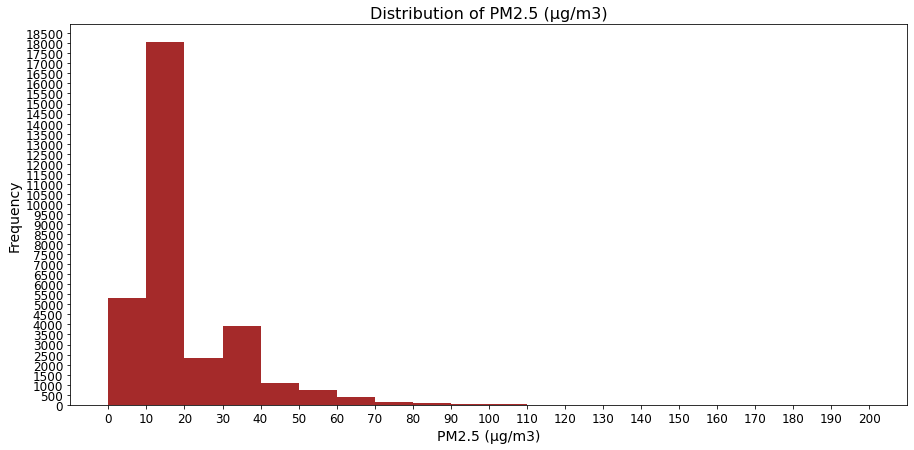

In [42]:
# drafting a rough histogram for the PM2.5 (μg/m3) variable to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

# Using magic of pandas area() function
air_df['PM2.5 (μg/m3)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 19000 with step size of 500 and label size of 12
plt.yticks(ticks=np.arange(0,19000,500), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM2.5 (μg/m3)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of PM2.5 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


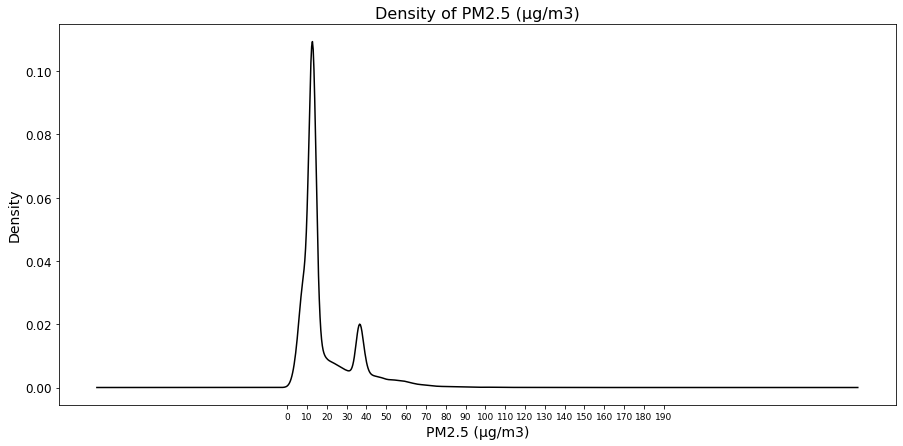

In [43]:
# Creating a kde of PM2.5() to see the distribution of data

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['PM2.5 (μg/m3)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 200 with step size of 10 and label size of 9
plt.xticks(ticks=np.arange(0, 200, 10), size=9)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM2.5 (μg/m3)', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of PM2.5 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


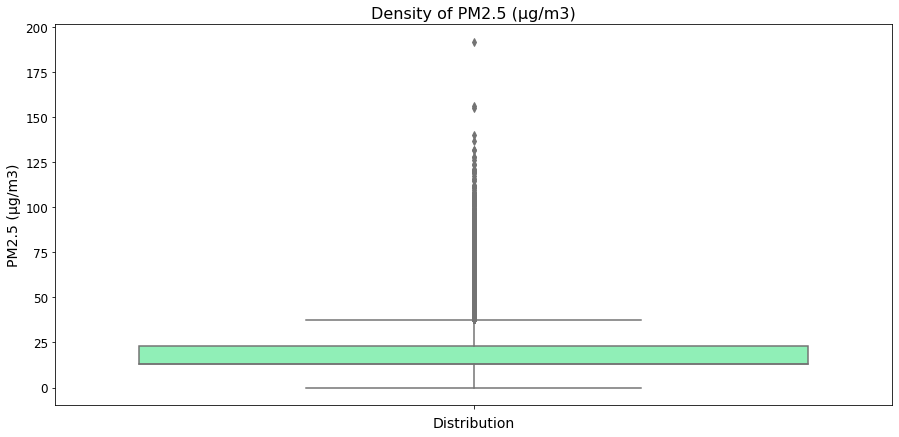

In [44]:
# creating a box plot for the PM2.5 (μg/m3) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='PM2.5 (μg/m3)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks ranging from 0 to 120 with step size of 25 label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM2.5 (μg/m3)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='Density of PM2.5 (μg/m3)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
#2 Looking at the PM10 (μg/m3)

In [12]:
air_df['PM10 (μg/m3)'].unique()

array([109.14,  17.65,  24.56, ...,  43.91,  48.62,  44.71])

In [13]:
air_df['PM10 (μg/m3)'].mean()

30.051370016493834

In [14]:
air_df['PM10 (μg/m3)'].median()

22.4

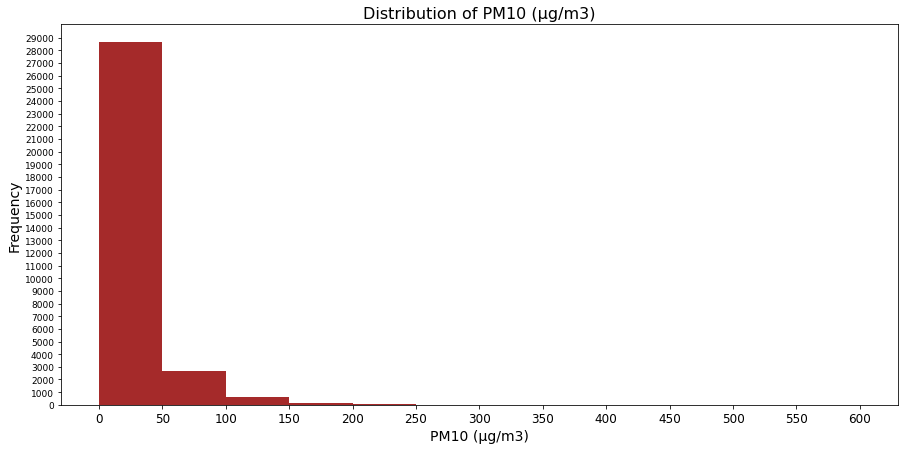

In [18]:
# making histogram for the variable PM10 (μg/m3) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,50,100,150,200,250,300,350,400,450,500,550,600]

# Using magic of pandas area() function
air_df['PM10 (μg/m3)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 30000 with step size of 1000 and label size of 9
plt.yticks(ticks=np.arange(0,30000,1000), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM10 (μg/m3)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of PM10 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


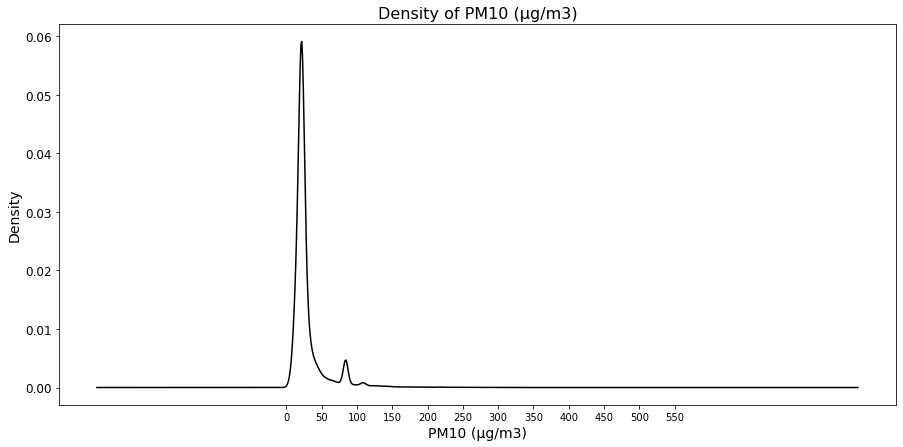

In [19]:
# making kde for the variable PM10 (μg/m3) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['PM10 (μg/m3)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 600 with step size of 50 and label size of 10
plt.xticks(ticks=np.arange(0, 600, 50), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM10 (μg/m3)', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of PM10 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

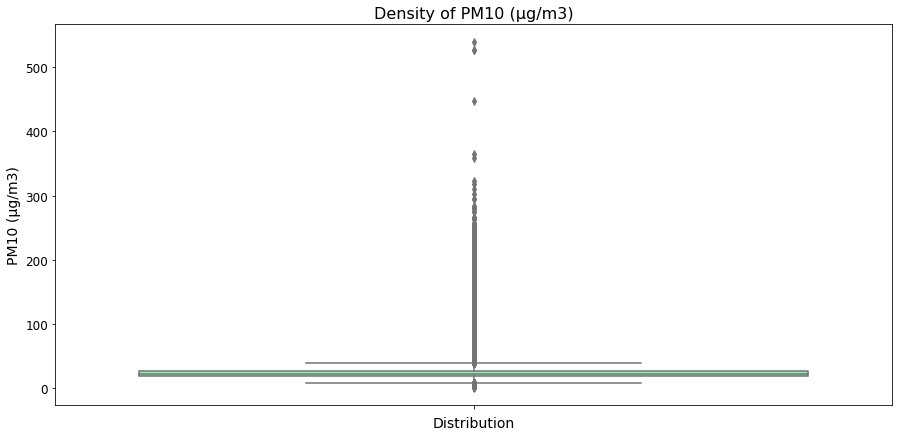

In [20]:
# creating a box plot for the PM10 (μg/m3) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='PM10 (μg/m3)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM10 (μg/m3)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='Density of PM10 (μg/m3)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
#3 Looking at the NO2 (μg/m3) level

In [21]:
air_df['NO2 (μg/m3)'].unique()

array([ 37.74,  26.63,  24.78, ..., 124.28,  70.69,  40.41])

In [22]:
air_df['NO2 (μg/m3)'].mean()

21.777874326972334

In [23]:
air_df['NO2 (μg/m3)'].median()

18.98

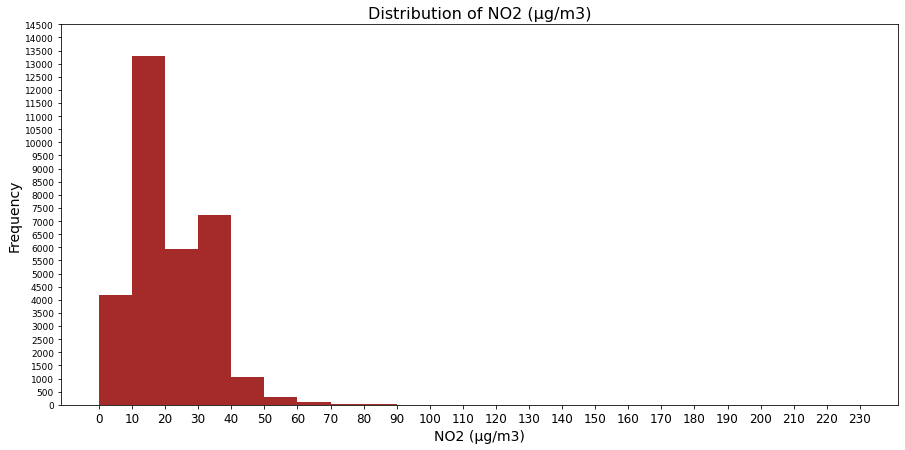

In [13]:
# making histogram for the variable NO2 (μg/m3) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230]

# Using magic of pandas area() function
air_df['NO2 (μg/m3)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 15000 with step size of 500 and label size of 9
plt.yticks(ticks=np.arange(0,15000,500), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='NO2 (μg/m3)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of NO2 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


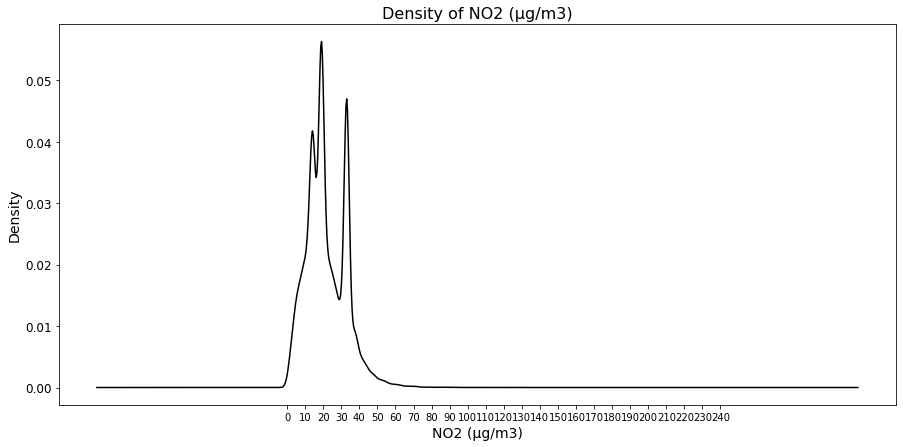

In [27]:
# making kde for the variable NO2 (μg/m3) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['NO2 (μg/m3)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 250 with step size of 10 and label size of 10
plt.xticks(ticks=np.arange(0, 250, 10), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='NO2 (μg/m3)', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of NO2 (μg/m3)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


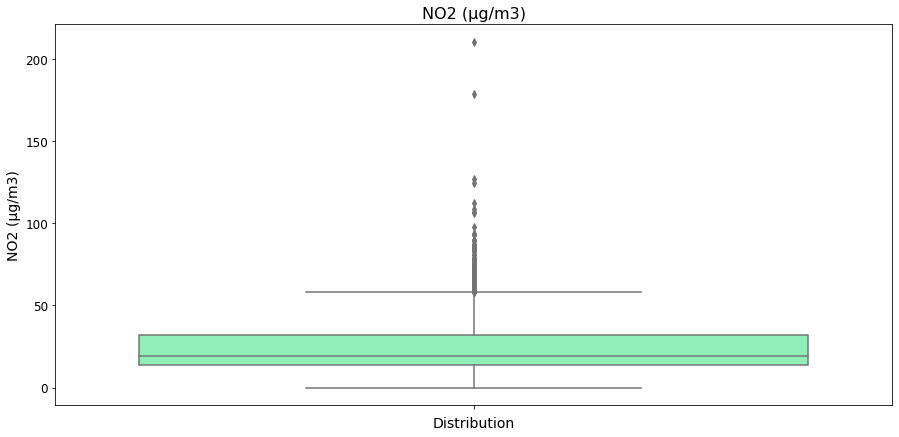

In [28]:
# creating a box plot for the NO2 (μg/m3) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='NO2 (μg/m3)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='NO2 (μg/m3)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='NO2 (μg/m3)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Checking for PM25 temporal coverage (%)

In [29]:
air_df['PM25 temporal coverage (%)'].unique()

array([18.        , 96.92922374, 76.        , ..., 95.9107807 ,
       80.239726  , 93.652968  ])

In [30]:
air_df['PM25 temporal coverage (%)'].mean()

94.4656838688206

In [31]:
air_df['PM25 temporal coverage (%)'].median()

96.92922374

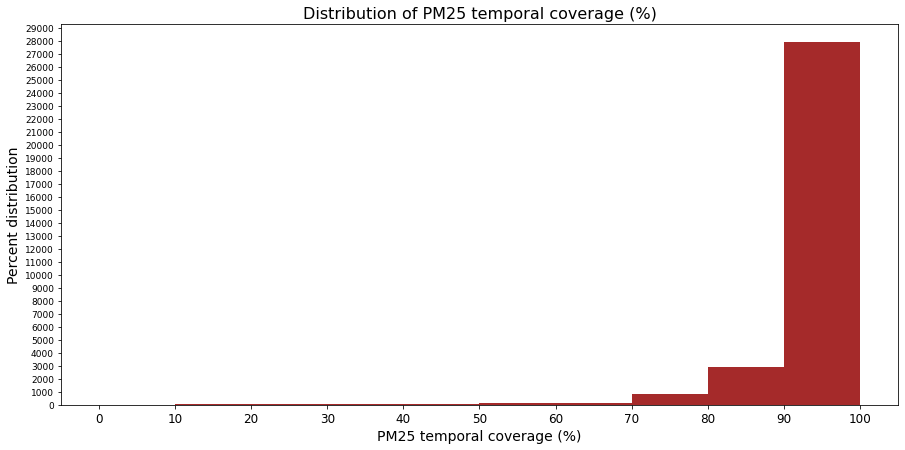

In [35]:
# making histogram for the variable PM25 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100]

# Using magic of pandas area() function
air_df['PM25 temporal coverage (%)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 30000 with step size of 1000 and label size of 9
plt.yticks(ticks=np.arange(0,30000,1000), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM25 temporal coverage (%)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Percent distribution', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of PM25 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


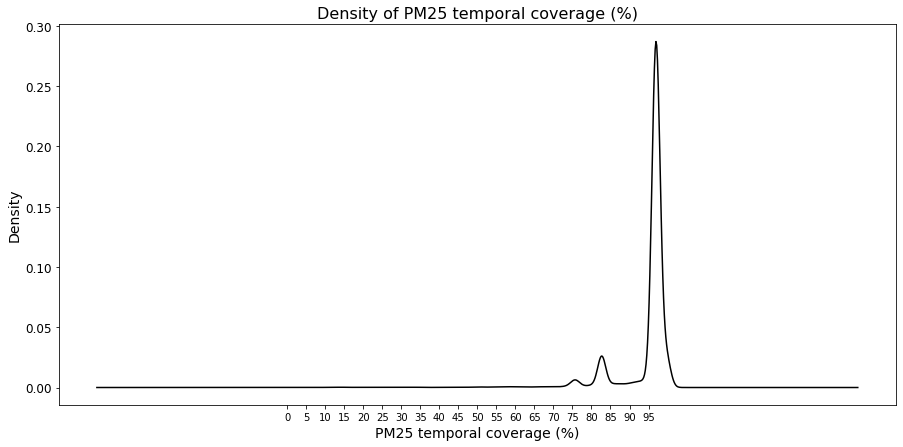

In [36]:
# making kde for the variable PM25 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['PM25 temporal coverage (%)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 100 with step size of 5 and label size of 10
plt.xticks(ticks=np.arange(0, 100, 5), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM25 temporal coverage (%)', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of PM25 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


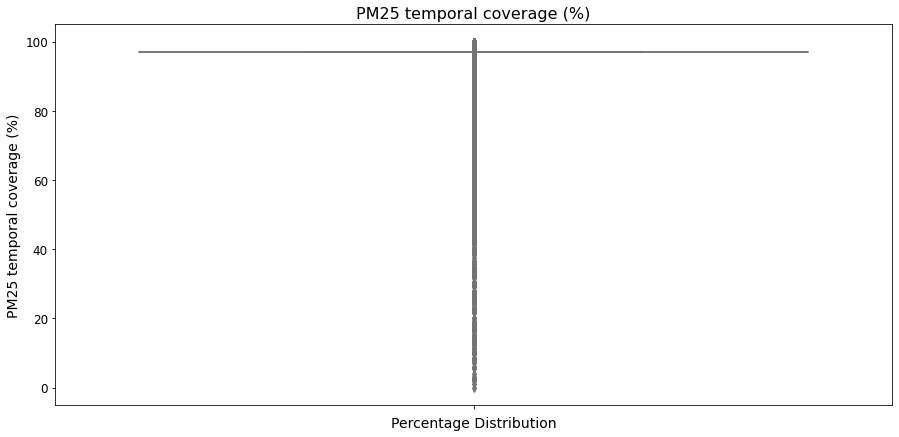

In [37]:
# creating a box plot for the PM25 temporal coverage (%) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='PM25 temporal coverage (%)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Percentage Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM25 temporal coverage (%)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='PM25 temporal coverage (%)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# 5 Checking in detail PM10 temporal coverage (%)

In [10]:
air_df['PM10 temporal coverage (%)'].unique()

array([87.43333333, 97.26      , 92.        , ..., 96.67808219,
       91.084     , 48.21917808])

In [11]:
air_df['PM10 temporal coverage (%)'].mean()

95.20964491129918

In [12]:
air_df['PM10 temporal coverage (%)'].median()

97.26

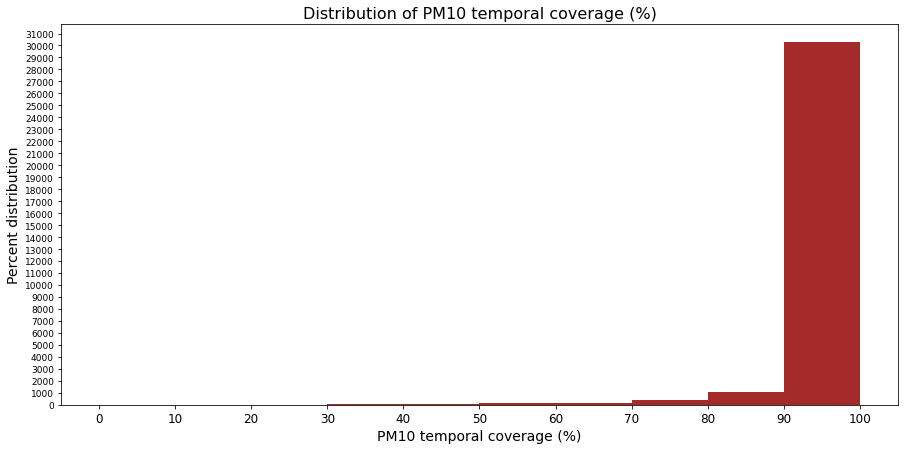

In [15]:
# making histogram for the variable PM10 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100]

# Using magic of pandas area() function
air_df['PM10 temporal coverage (%)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 32000 with step size of 1000 and label size of 9
plt.yticks(ticks=np.arange(0,32000,1000), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM10 temporal coverage (%)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Percent distribution', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of PM10 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


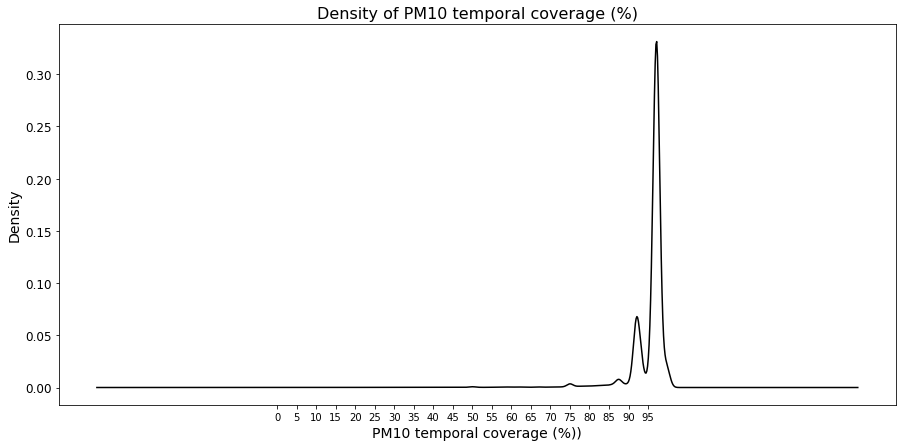

In [16]:
# making kde for the variable PM10 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['PM10 temporal coverage (%)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 100 with step size of 5 and label size of 10
plt.xticks(ticks=np.arange(0, 100, 5), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM10 temporal coverage (%))', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of PM10 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


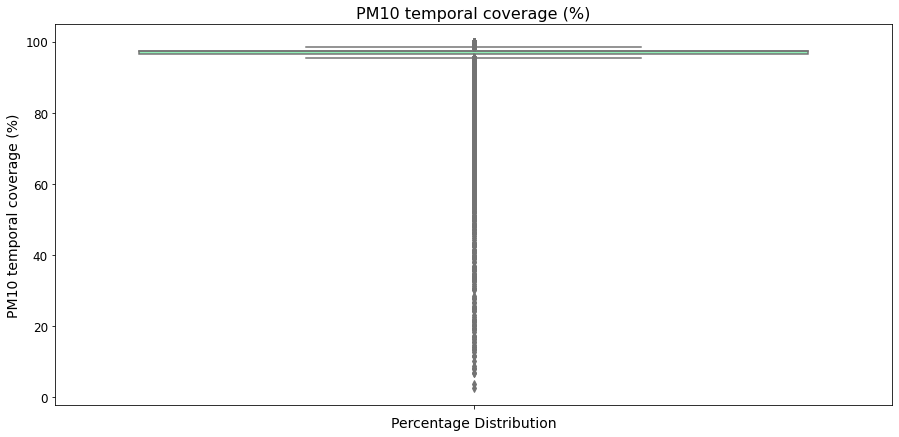

In [17]:
# creating a box plot for the PM10 temporal coverage (%) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='PM10 temporal coverage (%)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Percentage Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM10 temporal coverage (%)', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='PM10 temporal coverage (%)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# 6 Looking in detail for NO2 temporal coverage(%)

In [19]:
air_df['NO2 temporal coverage (%)'].unique()

array([94.39      , 83.96118721, 87.93260474, ..., 84.45205479,
       96.09589041, 88.45890411])

In [20]:
air_df['NO2 temporal coverage (%)'].mean()

94.56305219630366

In [21]:
air_df['NO2 temporal coverage (%)'].median()

96.6294258533333

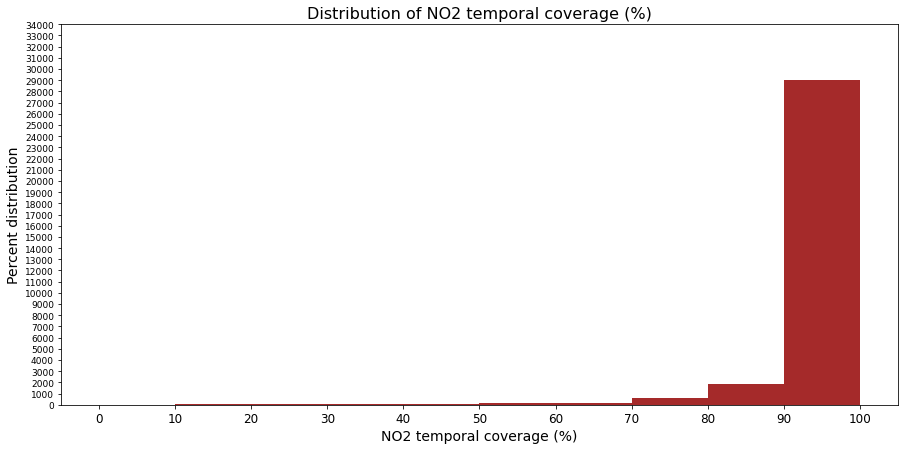

In [14]:
# making histogram for the variable NO2 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])

# Creating custom bins for the graph
bins = [0,10,20,30,40,50,60,70,80,90,100]

# Using magic of pandas area() function
air_df['NO2 temporal coverage (%)'].plot.hist(bins=bins, color='brown')

# Changing x-ticks equal to custom bin values
plt.xticks(ticks=bins, size=12)

#Changing y-ticks ranging from 0 to 35000 with step size of 1000 and label size of 9
plt.yticks(ticks=np.arange(0,35000,1000), size=9)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='NO2 temporal coverage (%)', size=14)

#Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Percent distribution', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of NO2 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


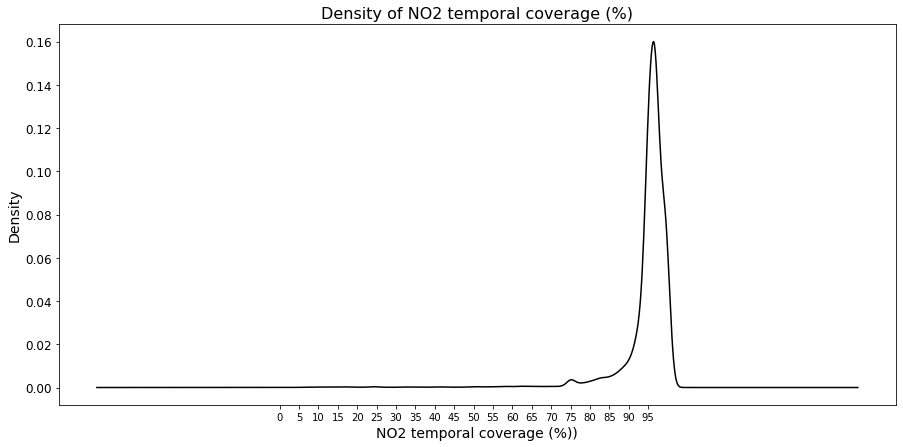

In [15]:

# making kde for the variable NO2 temporal coverage (%) to see the distribution

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

# Using magic of pandas kde() function
air_df['NO2 temporal coverage (%)'].plot.kde(color='Black')

# Changing x-ticks ranging from 0 to 100 with step size of 5 and label size of 10
plt.xticks(ticks=np.arange(0, 100, 5), size=10)

#Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='NO2 temporal coverage (%))', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Density', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Density of NO2 temporal coverage (%)', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


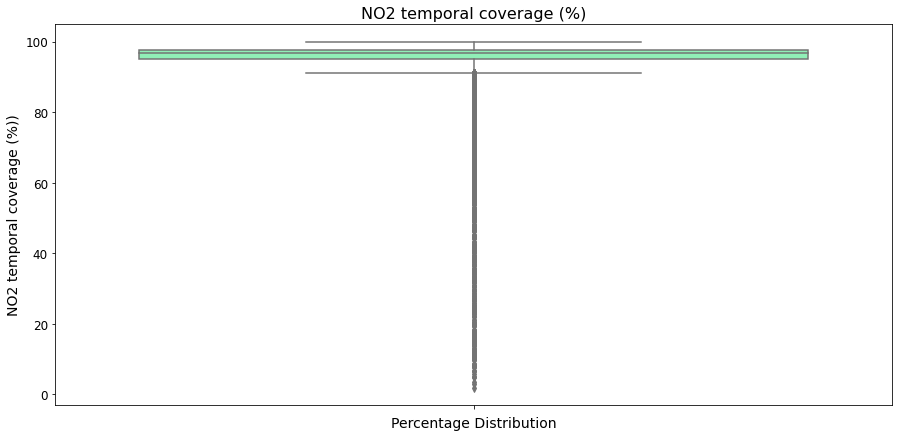

In [16]:
# creating a box plot for the NO2 temporal coverage (%) variable to see the outliers

# Creating a custom figure size of 15 X 7 inches
figure= plt.figure(figsize=[15,7])
# Using magic of seaborn's boxplot() function
sns.boxplot(y='NO2 temporal coverage (%)', palette='rainbow', data=air_df)
# Changing x-ticks label size of 12
plt.xticks(size=12)
# Changing y-ticks label size of 12
plt.yticks(size=12)
# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Percentage Distribution', size=14)
# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='NO2 temporal coverage (%))', size=14)
# Labelling title with a custom label and size of 16
plt.title(label='NO2 temporal coverage (%)', size=16)
# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Step 8 Exploratory Data Analysis
# Asking the right questions and perform analysis often using statistical graphics and other data visualization methods 
# The question should have following three
# Rule 1 - Relevant - to the objective
# Rule 2 - Reasonable - so that it can be acswered with data we have
# Rule 3 - non Vague - question should have same interpretation by anyone who reads it.


In [ ]:
# Univariate Questions
#1 What is the frequency distribution of data along various regions of the WHO world?
# 2 What is the distribution of annual mean average PM2.5 (μg/m3) level across data?
# 3 What is the distribution of annual mean average PM10 (μg/m3) level across data ?
# 4 What is the distribution of annual mean average NO2 (μg/m3) level across data?
# 5. What is the Percentage data reported in different reporting years
# Bivariate Analysis
# 1. What is WHO Region-wise Frequency distribution of PM2.5 (μg/m3) level ?
# 2. Whatis WHO Region-wise Frequency distribution of PM10 (μg/m3) level ?
# 3. What is WHO Region-wise Frequency distribution of NO2 (μg/m3) level ?
# Multivariate Analysis
# 1. What is WHO Region-wise annual mean PM2.5 level across the three reporting years?
# 2. What is WHO Region-wise annual mean PM10 level across the three reporting years?
# 3. What is WHO Region-wise annual mean NO2 level across the three reporting years?

In [ ]:
#1 What is the frequency distribution of data along various regions of the WHO world?

In [11]:
air_df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

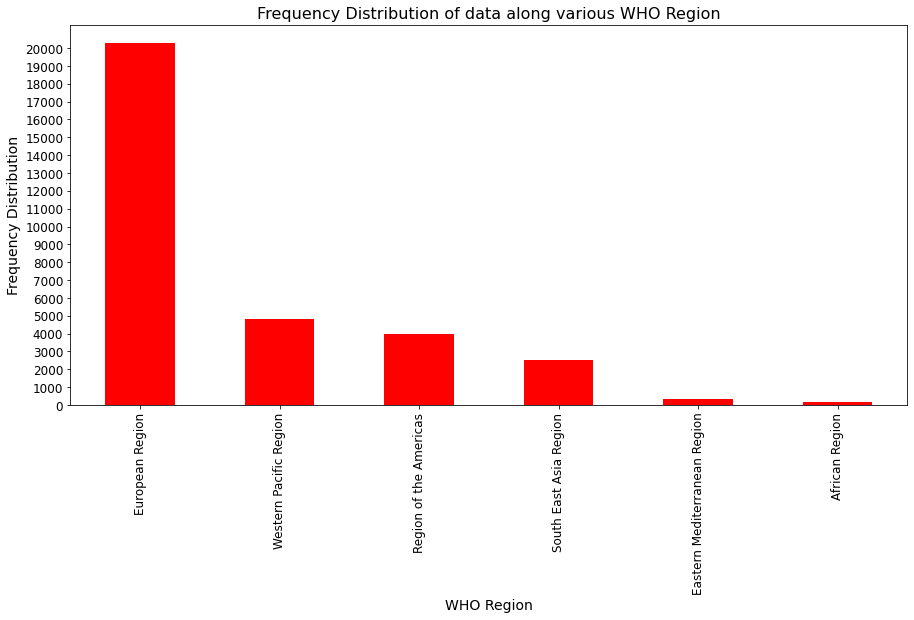

In [14]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas's bar function
air_df['WHO Region'].value_counts().plot.bar(color='Red')

# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(rotation=90, size=12)

# Changing y-ticks value using an array of 21000 value with step size of 2
plt.yticks(ticks=np.arange(0, 21000, 1000), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='WHO Region', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency Distribution', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Frequency Distribution of data along various WHO Region', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Observation
'''
Majority of the data is reported by the localities from European region followed by Western Pacific Region. 
The least number of localities from African Region reported the data.

'''

In [ ]:
# 2 What is the distribution of annual mean average PM2.5 (μg/m3) level across data?

In [18]:
air_df['PM2.5 (μg/m3)'].describe()

count   32130.00000
mean       19.15707
std        14.30524
min         0.01000
25%        12.81000
50%        12.81000
75%        22.78000
max       191.90000
Name: PM2.5 (μg/m3), dtype: float64

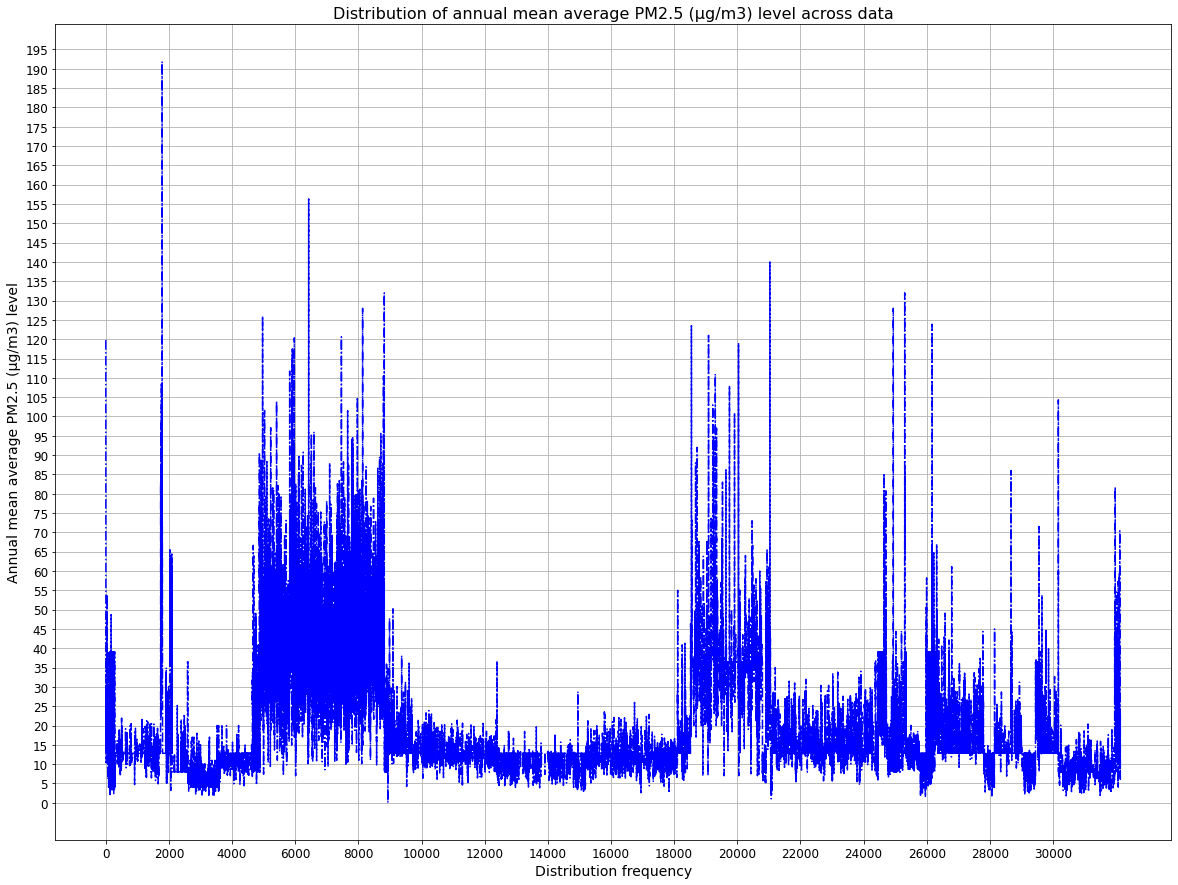

In [26]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[20, 15])

# Using magic of pandas line() function
air_df['PM2.5 (μg/m3)'].plot.line(color='blue', linestyle='-.')

# Changing x-ticks ranging from 0 to 31000 with step size of 2000 and label size of 12
plt.xticks(ticks=np.arange(0, 31000, 2000), size=12)

# Changing y-ticks ranging from 0 to 200 with step size of 5 and label size of 12
plt.yticks(ticks=np.arange(0, 200, 5), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution frequency', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Annual mean average PM2.5 (μg/m3) level', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of annual mean average PM2.5 (μg/m3) level across data', size=16)

# Enable the grid view in background
plt.grid(b=True)

# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Observation

'''
Majority of the data is distributed around the annual mean average PM2.5 (μg/m3) level of 10 to 80.
Very few observations are beyond 120 to 190 PM2.5 (μg/m3) level.

'''

In [ ]:
# 3 What is the distribution of annual mean average PM10 (μg/m3) level across data ?

In [11]:
air_df['PM10 (μg/m3)'].describe()

count   32131.00000
mean       30.05137
std        26.38706
min         1.04000
25%        19.48000
50%        22.40000
75%        27.47000
max       540.00000
Name: PM10 (μg/m3), dtype: float64

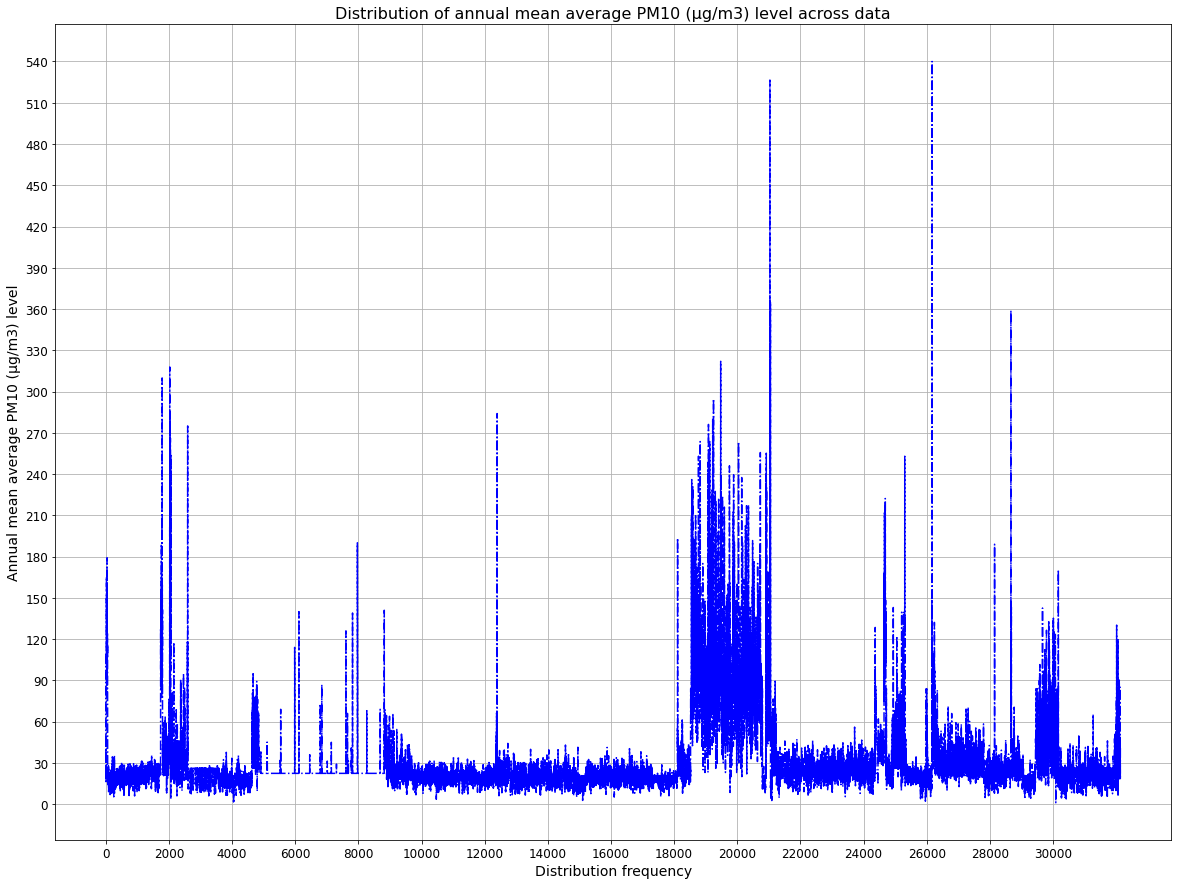

In [12]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[20, 15])

# Using magic of pandas line() function
air_df['PM10 (μg/m3)'].plot.line(color='blue', linestyle='-.')

# Changing x-ticks ranging from 0 to 31000 with step size of 2000 and label size of 12
plt.xticks(ticks=np.arange(0, 31000, 2000), size=12)

# Changing y-ticks ranging from 0 to 550 with step size of 30 and label size of 12
plt.yticks(ticks=np.arange(0, 550, 30), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution frequency', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Annual mean average PM10 (μg/m3) level', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of annual mean average PM10 (μg/m3) level across data', size=16)

# Enable the grid view in background
plt.grid(b=True)

# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Observation

'''
Majority of the data is distributed around the annual mean average PM10 (μg/m3) level of 10 to 40. Whereas, some clustering 
can be seen for the levels 30 to 270 annual mean average PM10 (μg/m3) level. Frequency distribution of annual mean average 
PM10 (μg/m3) level beyond 240 can be seen very rarely.

'''

In [ ]:
# 4. Density distribution of annual mean NO2 level

In [13]:
air_df['NO2 (μg/m3)'].describe()

count   32131.00000
mean       21.77787
std        11.15720
min         0.00000
25%        14.00000
50%        18.98000
75%        31.70000
max       210.68000
Name: NO2 (μg/m3), dtype: float64

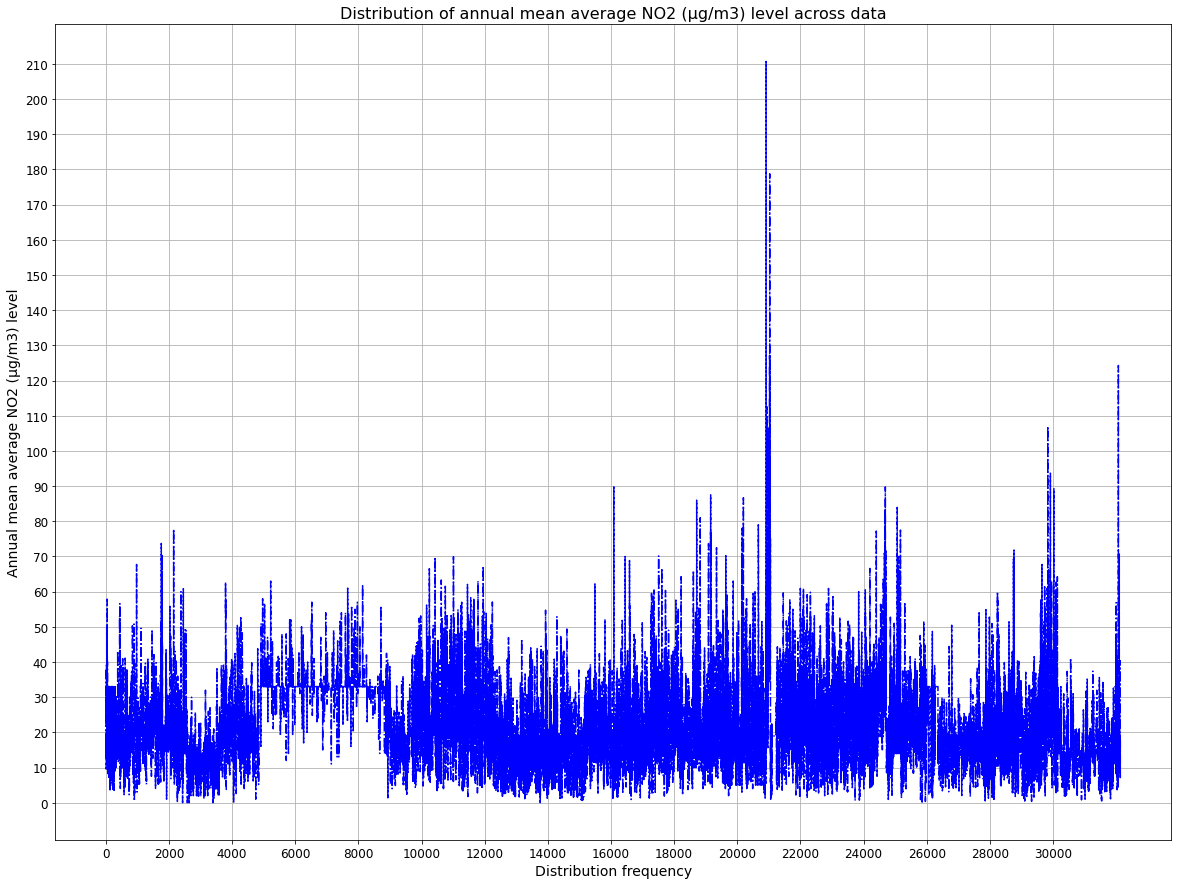

In [14]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[20, 15])

# Using magic of pandas line() function
air_df['NO2 (μg/m3)'].plot.line(color='blue', linestyle='-.')

# Changing x-ticks ranging from 0 to 31000 with step size of 2000 and label size of 12
plt.xticks(ticks=np.arange(0, 31000, 2000), size=12)

# Changing y-ticks ranging from 0 to 220 with step size of 10 and label size of 12
plt.yticks(ticks=np.arange(0, 220, 10), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Distribution frequency', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Annual mean average NO2 (μg/m3) level', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Distribution of annual mean average NO2 (μg/m3) level across data', size=16)

# Enable the grid view in background
plt.grid(b=True)

# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Observation

'''
Majority of the data is distributed around the annual mean average NO2 (μg/m3) level of 5 to 60 μg/m3.
Frequency distribution of annual mean average NO2 (μg/m3) level beyond 90 μg/m3 can be seen very rarely.


'''

In [ ]:
# 5 Percentage data reported in different reporting years

In [17]:
air_df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

In [21]:
air_df['Version of the database'].unique()

array([2022, 2018, 2016], dtype=int64)

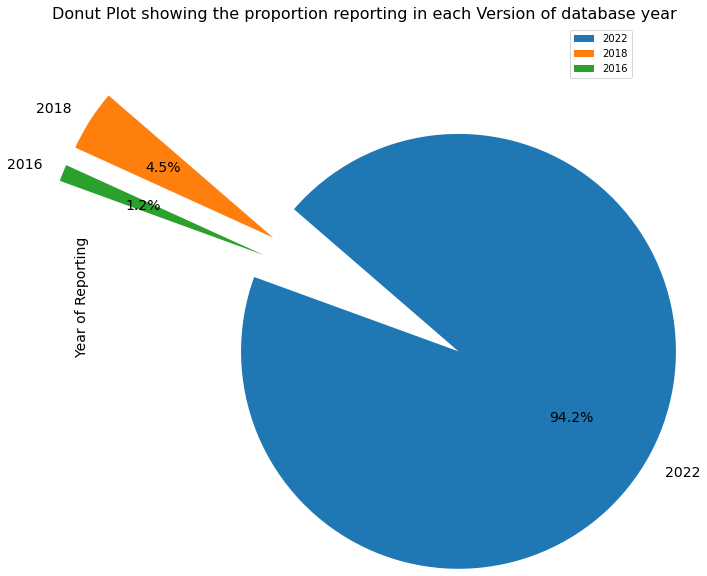

In [28]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[10, 10])

# Exploding space based on the number of categories of the variable Version of data base
space = np.ones(3)/2

# Using magic of pandas pie() function
air_df['Version of the database'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                       autopct='%3.1f%%', 
                                       startangle=160, legend=True)

plt.ylabel(ylabel='Year of Reporting', size=14)
plt.title(label='Donut Plot showing the proportion reporting in each Version of database year', size=16)
plt.show()

In [ ]:
# Observations

'''
Of the whole data reported, 94% of the data was reported during the year 2022, followed by 4.5% of the data reported 
during the year 2018 and only 1.2% of the data reported during the year 2016.


'''

In [ ]:
# Bivariate Analysis
# 1. WHO Region-wise Frequency distribution of PM2.5 (μg/m3) level 

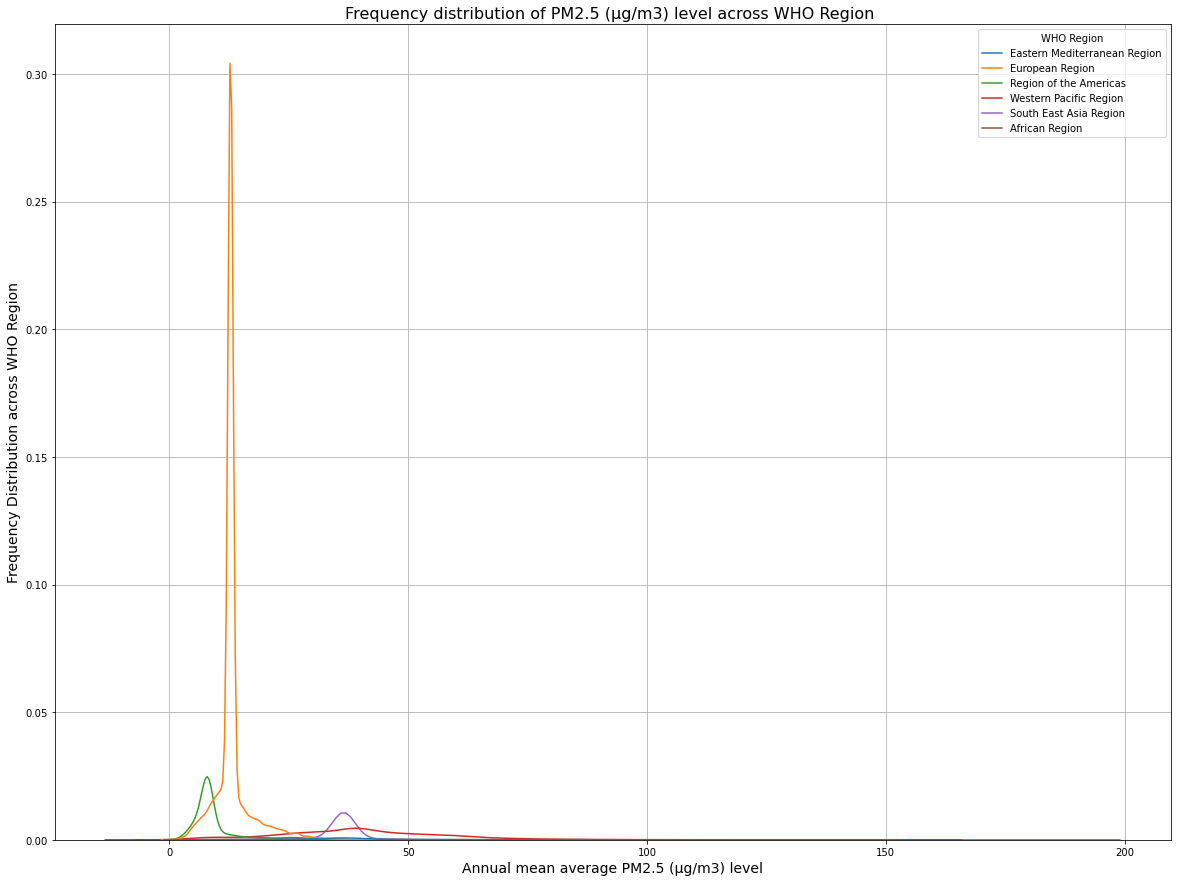

In [15]:
paper = plt.figure(figsize = (20,15))
sns.kdeplot(data=air_df, x='PM2.5 (μg/m3)', hue='WHO Region')

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Annual mean average PM2.5 (μg/m3) level', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency Distribution across WHO Region', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Frequency distribution of PM2.5 (μg/m3) level across WHO Region ', size=16)

# Enable the grid view in background
plt.grid(b=True)

# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Observation

'''
The frequency distribution for annual mean average PM2.5 (μg/m3) for European region, regions of America and South East 
Asia region fell in the range of 0 to 50 μg/m3, while for Eastern Mediterranean Region, Western Pacific Region and African 
region, it was distributed across across 0 to 200 μg/m3. 

'''


In [ ]:
#2. WHO Region-wise Frequency distribution of PM10 (μg/m3) level 

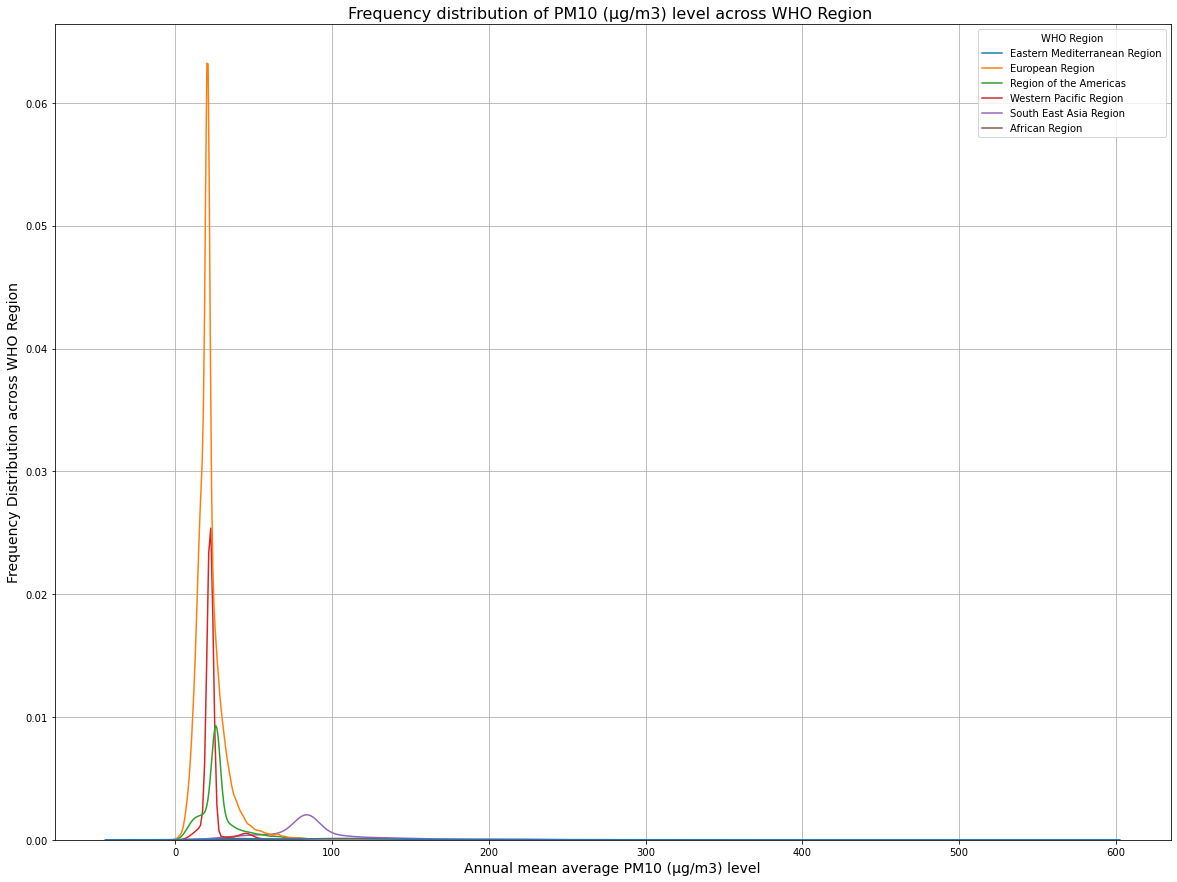

In [29]:
paper = plt.figure(figsize = (20,15))
sns.kdeplot(data=air_df, x='PM10 (μg/m3)', hue='WHO Region')

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Annual mean average PM10 (μg/m3) level', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency Distribution across WHO Region', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Frequency distribution of PM10 (μg/m3) level across WHO Region ', size=16)

# Enable the grid view in background
plt.grid(b=True)

# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Observation

'''
The frequency distribution of annual mean average PM10 (μg/m3) for European region, Western Pacific Region, Regions of the
America, South East Asian region fell in the range of 0 to 110 μg/m3. For Eastern Mediterranean region and African region 
it fell across 0 to 600 μg/m3.


'''

In [ ]:
#3. WHO Region-wise Frequency distribution of NO2 level

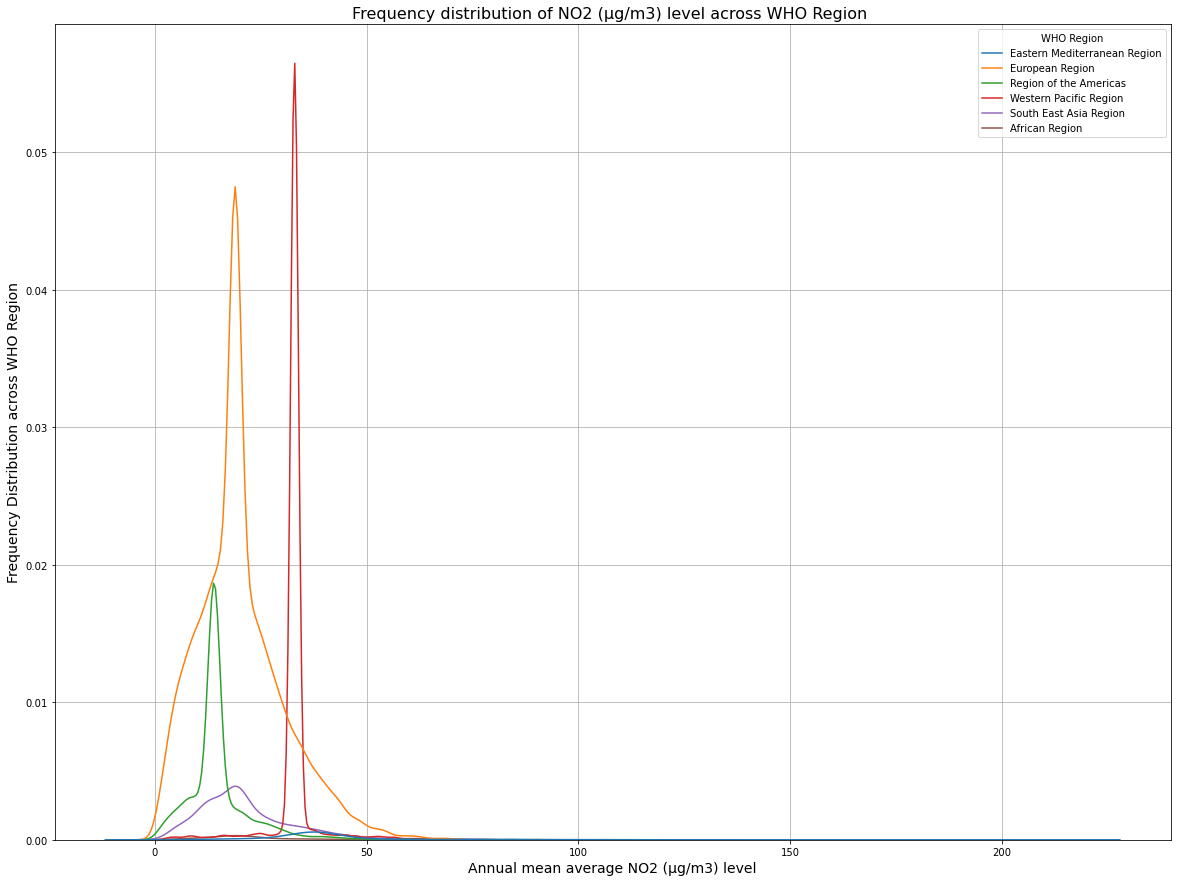

In [30]:
paper = plt.figure(figsize = (20,15))
sns.kdeplot(data=air_df, x='NO2 (μg/m3)', hue='WHO Region')

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Annual mean average NO2 (μg/m3) level', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Frequency Distribution across WHO Region', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Frequency distribution of NO2 (μg/m3) level across WHO Region ', size=16)

# Enable the grid view in background
plt.grid(b=True)

# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
# Observations

'''
The frequency distribution of annual mean average NO2 (μg/m3) for European region, Western Pacific Region, Regions of the
America, South East Asian region fell in the range of 0 to 110 μg/m3. For Eastern Mediterranean region and African region 
it fell across 0 to 200 μg/m3.


'''

In [ ]:
# Multivariate Analysis
# 1. WHO Region-wise annual mean PM2.5 level across the three reporting years

In [9]:
air_df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

In [12]:
air_df['Version of the database'].unique()

array([2022, 2018, 2016], dtype=int64)

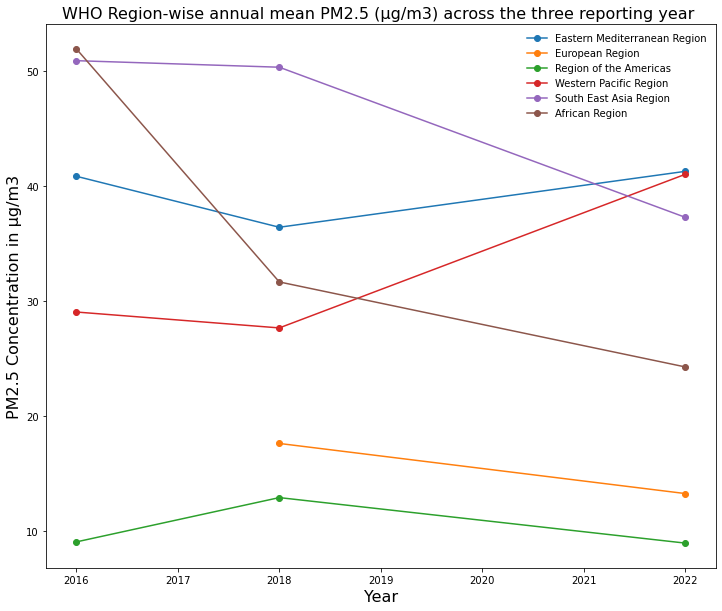

In [28]:
# First lets take the unique names of regions
Regions = air_df['WHO Region'].dropna().unique()

# Now lets groupby Region and year to find mean concentration for each region in each year
df_plot = air_df.groupby(['WHO Region', 'Version of the database']).mean()[['PM2.5 (μg/m3)']]

# Now we can Plot
fig = plt.figure(figsize=(12,10)) 

for region in Regions: 

 plt.plot(df_plot.loc[region].index, df_plot.loc[region].values, '-o', label = region) 

plt.xlabel('Year', size=16) 
plt.ylabel('PM2.5 Concentration in μg/m3', size = 16) 
plt.legend(loc=1, frameon=False);

# Labelling title with a custom label and size of 16
plt.title(label='WHO Region-wise annual mean PM2.5 (μg/m3) across the three reporting year ', size=16)

plt.show()

In [ ]:
# Observation

'''
The mean annual PM2.5 (μg/m3) level has fallen sharply from the year 2016 to the year 2022 across the cities and 
localities of South Eas Asian Region (from 50 to 40 μg/m3), African Region(from 55 to 28 μg/m3) and European region
(from 20 to 15 μg/m3). For Eastern Mediterranean region and Western Pacific region, the annual mean PM2.5 (μg/m3) 
level has rised sharply from the year 2016 to the year 2022 to 41 to 43 μg/m3 and 29 to 43 μg/m3 respectively.

For the regions of America the annual mean PM2.5 (μg/m3) level has remained constant from the year 2016 (8 μg/m3)to the 
year 2022 (8 μg/m3) while rising briefly in the year 2018 (13 μg/m3).
 

'''

In [23]:
# 2. WHO Region-wise annual mean PM10 level across the three reporting years

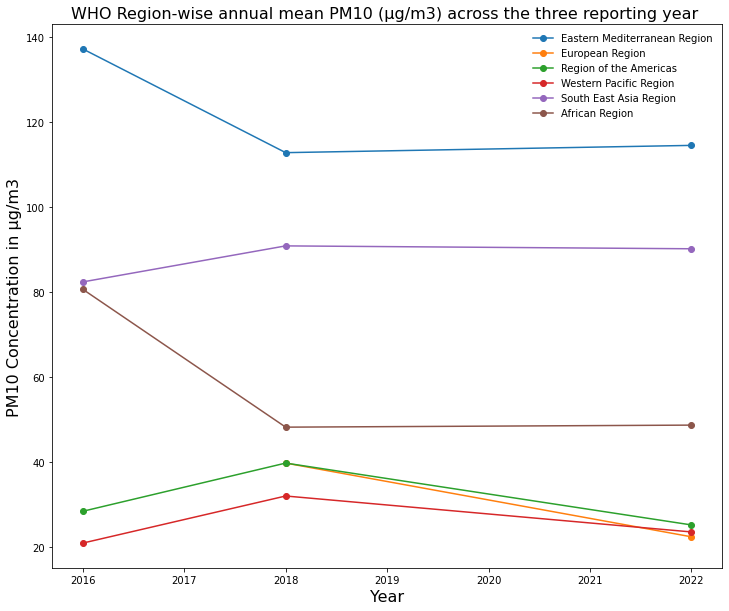

In [9]:
# First lets take the unique names of regions
Regions = air_df['WHO Region'].dropna().unique()

# Now lets groupby Region and year to find mean concentration for each region in each year
df_plot = air_df.groupby(['WHO Region', 'Version of the database']).mean()[['PM10 (μg/m3)']]

# Now we can Plot
fig = plt.figure(figsize=(12,10)) 

for region in Regions: 

 plt.plot(df_plot.loc[region].index, df_plot.loc[region].values, '-o', label = region) 

plt.xlabel('Year', size=16) 
plt.ylabel('PM10 Concentration in μg/m3', size = 16) 
plt.legend(loc=1, frameon=False);

# Labelling title with a custom label and size of 16
plt.title(label='WHO Region-wise annual mean PM10 (μg/m3) across the three reporting year ', size=16)


plt.show()

In [ ]:
# Observation

'''
The mean annual PM10 (μg/m3) level across the reporting year 2016, 2018 and 2022 has risen slightly for the South East Asian 
Region only(from 81 to 84 (μg/m3).

While for the Eastern Mediterranean region (from 138 to 125 μg/m3), African Region (from 80 to 50 μg/m3),European region 
(from 38 to 20 μg/m3) the mean annual PM10 (μg/m3) level across the reporting year 2016, 2018 and 2022 has fallen. 

For the regions of America (from 29 to 28 μg/m3) and Western Pacific Region (from 20 to 21 μg/m3), the mean annual PM10 (μg/m3) 
from the reporting year 2016 to 2022 has almost remained constant.

'''

In [ ]:
# 3. WHO Region-wise annual mean NO2 level across the three reporting years

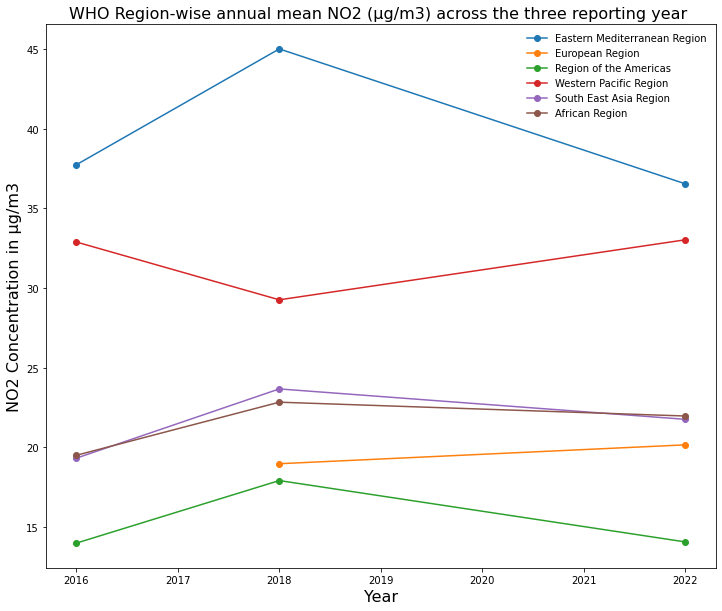

In [10]:
# First lets take the unique names of regions
Regions = air_df['WHO Region'].dropna().unique()

# Now lets groupby Region and year to find mean concentration for each region in each year
df_plot = air_df.groupby(['WHO Region', 'Version of the database']).mean()[['NO2 (μg/m3)']]

# Now we can Plot
fig = plt.figure(figsize=(12,10)) 

for region in Regions: 

 plt.plot(df_plot.loc[region].index, df_plot.loc[region].values, '-o', label = region) 

plt.xlabel('Year', size=16) 
plt.ylabel('NO2 Concentration in μg/m3', size = 16) 
plt.legend(loc=1, frameon=False);

# Labelling title with a custom label and size of 16
plt.title(label='WHO Region-wise annual mean NO2 (μg/m3) across the three reporting year ', size=16)

plt.show()

In [ ]:
# Observation

'''
The annual mean NO2 (μg/m3) from the reporting year 2016 to 2022 has raised slightly for the regions of South East Asia
(19 to 23 μg/m3), African region (19 to 23 μg/m3) and European region (18 to 20 μg/m3).

For the Eastern Mediterranean region (37 to 37 μg/m3) , Western Pacific Region (34 to 34 μg/m3) and regions of America
( 7 to 7 μg/m3), the annual mean NO2 (μg/m3) from the reporting year 2016 to 2022 has almost remained constant.


'''

In [ ]:
# Step 9- Summarization

In [ ]:
'''
Summary

1. This is the fifth WHO air quality database, covering more than 6000 human settelments, collected from more than 117 countries.
It show cases where the pollution indicators i.e. PM2.5, PM10 and NO2 are higher and thus affecting the health of the population.
The recommended levels of PM2.5 (μg/m3) levels are 5 (μg/m3) as per WHO AQG (Air Quality Guideline 2021). For PM10 (μg/m3) it is
15 (μg/m3) and for NO2 its is 10 (μg/m3). Both the recommended levels are as per WHO AQG 2021. 

2. PM2.5 (μg/m3) is considered as a proxy for estimating health impacts directly, thus its values are usefull in assessing the 
same. Whereas, NO2 (μg/m3) level is considered as a proxy for anthorpogenic fuel combustion, specifically from traffic and 
specifically in Urban settings.

3. The dataset has most of the responses from the cities and localities of European region, followed by western pacific region.
The least number of cities from African region contributed to the data. Whereas, more than 90% of the dataset is reported from 
the year 2022.

4. The annual mean PM2.5(μg/m3) level across all the cities as well as localities in the dataset was ranging from 10 to 80 
(μg/m3). Which is almost two to sixteen times higher than the recommended WHO AQG 2021 levels. As PM2.5 is considered better 
proxy for health impact indicator, thus this showcases that most of the cities air quality is not as per WHO AQG level for good 
health of the population. Further many cities across Eastern Mediterranean Region, Western Pacific Region and African region had
annual mean PM2.5(μg/m3) level ranging till 200 μg/m3 compared to the other three regions i.e. European region, region of 
America and South East Asia Region. On similar lines, looking at year wise data for the years 2016, 2018 and 2022, for Eastern 
Mediterranean region and Western Pacific region, the annual mean PM2.5 (μg/m3) level has raised sharply.

5. The annual mean PM10 (μg/m3) level across all the cities as well as localities in the dataset was ranging from 10 to 40 
(μg/m3). Thus, there are cities and localities falling under the recommended WHO AQG PM10 (μg/m3) level. But many cities have 
almost two times the recommended WHO AQG PM10(μg/m3) levels. Further, for Eastern Mediterranean region and African region the 
cities and localities had values ranging till 600 μg/m3. Looking at the year wise(form 2016 to 2022) mean annual PM10 μg/m3, 
only the South East Asian region had seen a slight rise. Other regions either had constant or falling annual mean PM10 μg/m3. 


6. The annual mean NO2 (μg/m3) level across all the cities as well as localities in the dataset was ranging from 5 to 60 (μg/m3). 
Therefore, certain cities and localities had the recommended WHO AQG NO2 (μg/m3) level but many had levels six times than 
recommended by WHO. As, NO2(μg/m3) level are considered proxy for anthropogenic fuel combustion mostly coming from traffic 
specifically from Urban areas, thus this is an area of concern for those cities with levels above those recommended by WHO. 
Following the pattern of PM2.5 (μg/m3), PM10 (μg/m3), the eastern Mediterranean region and African region had NO2(μg/m3) values
ranging till 200 (μg/m3). Looking at the year wise data from 2016 to 2022, the annual mean NO2 (μg/m3) had raised slightly for 
the regions of South East Asia, Africa and Europe.

Limitations of the data

Data from different countries are of limited comparability because of :
(a) Vraious location of measurement stations; 
(b) Several measurement methods;
(c) Different temporal coverage of certain measurements; if only part of the year was covered, the measurement may significantly 
deviate from the annual mean due to seasonal variability;  
(d) Possible inclusion of data which were not eligible for this database due to insufficient information to ensure compliance;
(e) Heterogeneous quality of measurements;
(f) Omission of data which are known to exist, but which could not yet be accessed due to language issues or limited 
accessibility.


Actionable Points
1. The rising NO2 levels in the South East Asia and other regions suggests for alternatives to anthropogenic fuels like CNG 
(Compressed Natural Gases), electric vehicles etc. should be used.
2. The rising PM10 levels in South East Asia and other regions can be done by using HEPA filters, quitting smoking, using 
solar energy etc.

'''